# 1. Введение

### → В предыдущем модуле мы уже познакомились со статистической проверкой гипотез. Однако гипотезы, которые мы проверяли ранее, были довольно абстрактными и далеки от бизнеса. Теперь мы научимся применять теорию проверки статистических гипотез в условиях, приближенных к боевым! 

В этом модуле мы поговорим об A/B-тестировании: о том, что это такое, зачем и когда оно проводится, а также разберём несколько практических задач. 

### Умение хорошо разбираться в A/B-тестировании — востребованный среди работодателей навык. Чем же он так ценен для специалиста Data Science? Этот навык позволяет отвечать не только на насущные вопросы бизнеса, например «А увеличится ли наша прибыль, если мы введём скидки для определённых групп пользователей?"», но и на вопросы, специфичные для Data Science, например «А действительно ли хорошо работает модель, которая рекомендует товары нашим пользователям?». 

### Метод A/B-тестирования может дать трезвую оценку результатов работы в реальных условиях бизнес-задачи. Также метод позволяет выявлять истинные потребности пользователей вашего приложения.

### Для оценки результатов A/B-тестирования нам пригодятся навыки построения доверительных интервалов — это ещё одна статистическая метрика, с которой нам предстоит познакомиться.

### ЦЕЛЯМИ ЭТОГО МОДУЛЯ ЯВЛЯЮТСЯ:

⭐️ рассмотреть теорию A/B-тестирования, примеры применения A/B-тестирования в Data Science и других сферах;

⭐️ разобрать основные этапы A/B-тестирования и базовые принципы его проведения;

⭐️ научиться определять размер выборки и длительности, необходимой для корректного проведения теста;

⭐️ рассмотреть основные инструменты для анализа результатов A/B-тестирования: кумулятивные графики, статистические тесты и доверительные интервалы;

⭐️ решить практическую задачу оценки результатов A/B-тестирования.

### Мы не будем концентрироваться на теории и уделим достаточно времени практике, ведь без умения применять функции для проверки гипотез нам не обойтись!

# 2. Суть и сферы применения A/B-тестирования

### → Прежде чем перейти к определению A/B-тестирования, рассмотрим реальный кейс компании Ozon, связанный с изменениями карточки товара.

### Цель кейса состояла в том, чтобы увеличить конверсию добавления товара в корзину пользователями приложения Ozon. Команда предположила, что обычных фотографий товара может не хватать для принятия решений. Поэтому было решено переместить фотографии покупателей вместе с отзывами в верхнюю часть карточки товара.

+ Конверсия — отношение числа посетителей сайта, выполнивших на нём какие-либо целевые действия, к общему числу посетителей сайта, выраженное в долях или процентах. Под целевым действием можно подразумевать покупку товара, лайк или репост поста в Instagram, просмотр фильма на Кинопоиске и многое другое. 

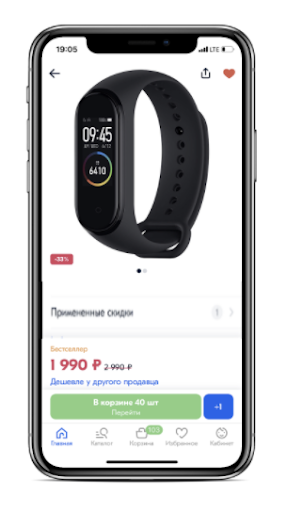
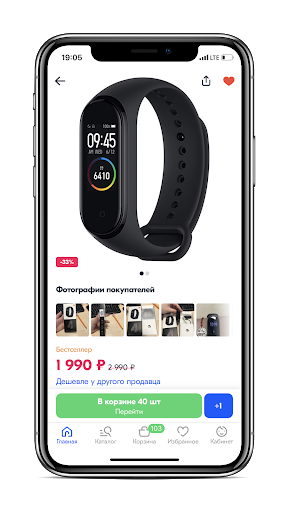

## ГИПОТЕЗА И МЕТРИКА

Исследование всегда начинается с выдвижения гипотезы. Напомним, **гипотеза** — это утверждение, предполагающее доказательство. 

При формировании гипотезы мы сразу высказываем предположение о том, как реализация проекта повлияет на метрики. 

**Метрика** — численное отображение целевого показателя. Это может быть значение конверсии, среднего чека, посещаемости заведения и так далее. Метрика позволяет нам от субъективных оценок «хорошо» и «плохо» перейти к конкретным числам. 

**Пример составления гипотезы:** Конкретное изменение X повлияет на метрику Y на Z единиц.

В случае с кейсом Ozon гипотеза звучала следующим образом: «Заданное на второй картинке расположение фотографий (X) увеличит конверсию добавления товара в корзину с карточки товара (Y) на 2 % (Z)».

Итак, возникает вопрос: каким образом можно проверить данную гипотезу? Как с определённой долей уверенности убедиться в том, что она является истинной? На эти вопросы нам помогает ответить матушка-статистика и A/B-тестирование!

### **A/B-тестирование** — это метод, пришедший к нам из маркетинга. Он заключается в сравнении **текущей версии продукта (версии А)** с его **изменённой версией (версией B)** на основании данных, полученных до введения обновления в продукт и после него.

+ Текущую версию продукта (версию А)  называют контрольной версией. В кейсе Ozon контрольной версией является вариант дизайна раздела товара на первой картинке. 
+ Новую версию продукта (версию B) называют тестовой версией. В рассматриваемом кейсе тестовой версией будет вариант дизайна на второй картинке.

### Метод основан на проверке статистической значимости результатов эксперимента и позволяет заранее задать границу уверенности в результатах исследования **(уровень надёжности)**. 

### Для кейса Ozon результаты A/B-тестирования оказались вполне успешными: удалось подтвердить гипотезу команды, а при дальнейшем анализе обнаружились категории товаров, в которых эту функциональность не стоило запускать сразу. Проведение A/B-тестирования и проверка гипотезы позволило компании увеличить прибыль, лишь поменяв дизайн вкладки товара. 

Давайте же разберёмся, в чём же заключается A/B-тест?

# МЕХАНИЗМ A/B-ТЕСТИРОВАНИЯ

### A/B-тестирование и все производные от него (A/A, A/A/B, A/B/C) также принято называть **сплит-тестами** (от англ. split, разделять), что объясняется основополагающим принципом их проведения.

### Опишем механику A/B-тестов в общих чертах.

### Чтобы протестировать какую-либо гипотезу при помощи A/B-теста, аудиторию разделяют на две части: 

+ группа A продолжает использовать (видеть) старую версию продукта;
+ группа B начинает использовать новую.

### В реальном времени собирается информация об обеих группах теста, проводятся замеры важных показателей. После этого проводится сравнение этих показателей и принимается решение об эффективности влияния гипотезы на показатели продукта. 

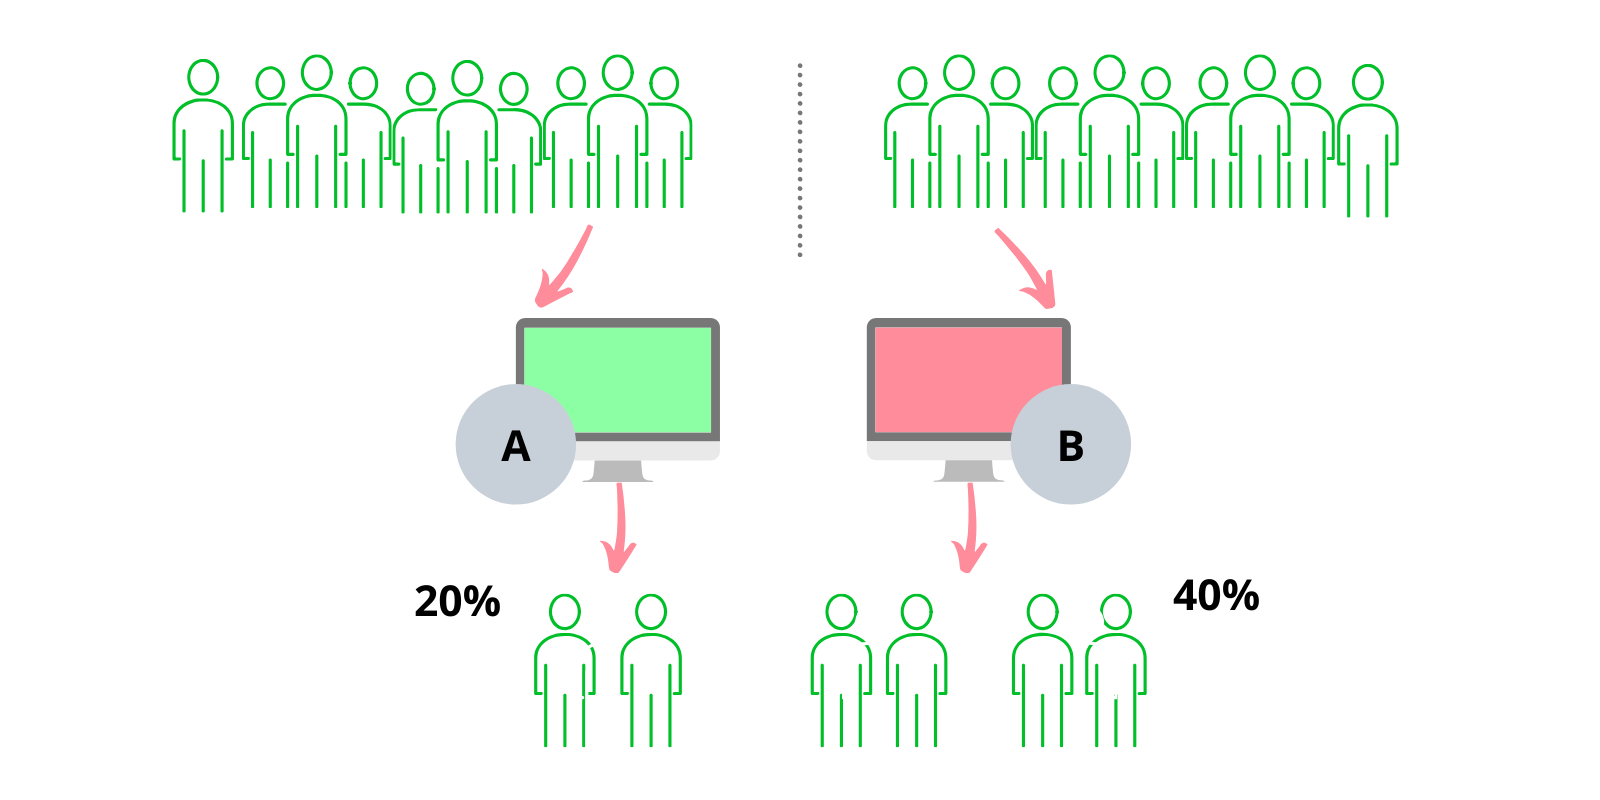

### На картинке изображено схематическое представление механизма А/B-тестирования. Есть два варианта дизайна: зелёный и красный. Каждый вариант дизайна предоставляется соответствующей группе пользователей, и считается метрика (например, конверсия). На основании рассчитанной метрики определяется более эффективный вариант.

### На первый взгляд может показаться, что ничего сложного в этом процессе нет. Но на деле тестирование — достаточно дорогой и непростой инструмент. A/B-тестирование очень чувствительно к получаемым данным и требует большого внимания на всех его этапах.

О тонкостях процесса проведения тестирования и оценке его результатов мы поговорим в дальнейших юнитах. 

# СФЕРЫ ПРИМЕНЕНИЯ A/B-ТЕСТИРОВАНИЯ

A/B-тесты используют везде и всюду, где необходимо проверять какие-то гипотезы. Давайте рассмотрим несколько примеров отраслей, где применяют A/B-тесты.

## Медицина

Например, с помощью A/B-теста можно выявить положительные эффекты в препаратах.

Все вы слышали про эффект плацебо. Применение плацебо — не что иное, как A/B-тестирование, когда одной группе тестируемых дают реальное лекарство, а другим — пустышку, и смотрят на итоговые результаты.

## Розничная торговля

Большие ритейл-компании, такие как X5, тестируют различные варианты расстановки товаров в магазине и влияние позиции товаров на продажи конкретного магазина. Например, можно тестировать положение брендов на полке: в одном магазине на полке с консервами перед глазами лежит Bonduelle, а в другом — Heinz. В итоге можно посмотреть, изменилась ли доля продаж бренда в зависимости от магазина.

У такого A/B-теста есть сложности: на входе в магазин нельзя поставить турникет, который бы мог одних пользователей отправлять налево, а других — направо.

В таком случае аналитики сначала выбирают максимально похожие друг на друга магазины по площади, ассортиментной матрице, текущему обороту, местоположению и так далее. Как вы понимаете, это очень сложный и трудоёмкий процесс.

## Интернет-маркетинг

В этой сфере можно тестировать разные виды баннеров, рекламных кампаний, призывов к действию.

Довольно много проводят A/B-тестов в рекламных кампаниях Google Рекламы, Яндекс.Директа, Facebook. Рекламные сервисы уже сейчас позволяют случайным образом расщеплять трафик на части и показывать пользователям разные тексты объявлений.

Сегодня вообще весь интернет и всё больше сервисов проводят десятки A/B-тестов ежедневно:

+ Google и Яндекс тестируют ранжирование поисковой выдачи, количество рекламных блоков на странице.

+ Ozon тестирует карточку товара или процесс оформления заказа.

+ Другой большой e-commerce магазин тестирует, как маркетинговые акции и системы лояльности сказываются на покупательской способности в дальнейшем.

# A/B-ТЕСТИРОВАНИЕ ML-МОДЕЛЕЙ

### Помимо того, что A/B-тестирование позволяет отвечать на вопросы бизнеса о пользователях, оно может стать очень важным инструментом выявления эффективности построенной дата-сайентистом модели и позволить понять, как она показывает себя в реальных условиях.

Итак, давайте погрузимся в банковский кейс. 

### Представьте, что вы — дата-сайентист в банке и занимаетесь построением моделей для оптимизации мобильного приложения этого банка. 

### В приложении уже присутствует некоторая модель искусственного интеллекта, которая позволяет пользователям планировать свой бюджет на следующий месяц на основе расходов и доходов на предыдущие месяцы и поправок, введённых пользователем (планы на отпуск, повышение на работе и прочие внешние факторы). Для конкретики представим, что в среднем эта модель ошибается на 7 000 рублей.

### Как мы знаем, мир искусственного интеллекта не стоит на месте. И вот в научно-популярном журнале выходит статья от некоторого университета, где подробно разбирается новая, якобы более совершенная методика решения задачи прогнозирования. Вы с коллегами изучили эту статью и построили на её основе новую модель для планирования бюджета.

### И вот вы добрались до **этапа оценки модели**(*Об этапах работы над Data Science-проектом мы говорили в модуле по обзору профессии*). Вы «прогоняете» вашу модель на припасённых заранее тестовых данных. Тесты показывают, что в среднем модель ошибается в своих прогнозах на 3 000 рублей, что является лучшим результатом, чем есть сейчас, то есть модель оправдывает ваши ожидания! У вас уже чешутся руки, чтобы отправить прошлую модель в небытие и поставить новую.

### **Спешим вас расстроить…*** Ваши показатели на тестовой выборке пока что мало что значат. Разница в показателях может быть обусловлена чистой случайностью или внешними факторами. Модель должна начать работать на реальных данных и доказать свою эффективность «в бою». Чтобы проверить эту эффективность можно провести сравнительное тестирование в условиях, приближенных к реальным. Тут-то вам и поможет A/B-тестирование!

### В качестве контрольного варианта (варианта А) возьмём текущую версию приложения банка, в которой стоит старая модель. В качестве тестового варианта (варианта B) возьмём новую версию модели и внедрим её в раздел Планирование бюджета в приложении. 

### Разделим клиентов на две группы: группу А, которая будет пользоваться текущей версией приложения, и группу B, которой предоставим новую функциональность. 

### Для простоты рассмотрим предсказания моделей только на один месяц вперёд. В качестве метрики мы можем взять какую-то бизнес-метрику и/или метрику качества модели (о них мы поговорим в блоке по ML). Значение показателя будем считать для двух моделей в абсолютно равных условиях. 

+ Тогда мы будем рассматривать следующую гипотезу: Новая версия модели увеличит <выбранную метрику> на <n пунктов>. 

### На основании результатов A/B-тестирования мы можем сделать вывод о том, стоит ли производить замену текущей модели на новую или же результат новой модели статистически незначим.

### Таким образом, A/B-тестирование позволяет нам оценить работу модели в реальных условиях и понять, имеет ли смысл вводить её в продакшен.

# 3. Алгоритм, принципы и параметры A/B-тестирования

## → **A/B-тестирование** — это настоящий эксперимент, в котором вы выдвигаете гипотезу (например: «Варианты А и B равнозначны» (помним, что нулевая гипотеза в статистике — это всегда про «равенство») против альтернативной гипотезы «Вариант B лучше, чем вариант А по показателю Y на Z %»), ставите «опыты» над пользователями и смотрите на изменение определённой заранее метрики.

### Как и в любом эксперименте, при проведении A/B-тестирования очень важно соблюдать «правила безопасности»: тестирование необходимо проводить по определённым канонам, которые были разработаны на практике другими специалистами.

### Если не соблюдать эти правила, эксперимент может пойти не по плану и произойдёт «бум»! Ничего, конечно, не взорвётся, но из-за сильного отклонения от установленных правил существенно повышается вероятность совершить следующие типичные ошибки:

+ **Отвергнуть верную нулевую гипотезу — совершить ошибку I рода.** Например, на основе полученных данных вы можете принять решение, что вариант B является более предпочтительным, однако такая разница была обусловлена лишь случайностью или внешними факторами. В таком случае, помимо времени и денег, потраченных на A/B-тестирование, вы бессмысленно тратите деньги и время ещё и на глобальную интеграцию варианта B, а его эффективность оказывается на уровне или даже хуже варианта A.

+ **Принять неверную нулевую гипотезу — совершить ошибку II рода.** Например, на основе полученных данных вы можете принять решение, что для пользователей нет разницы между вариантами А и В, хотя на самом деле вы произвели некорректное сравнение и вариант В был лучшим. В таком случае вы теряете только время и деньги, потраченные на проведение A/B-тестирования, и упустите возможный дополнительный доход от улучшения.

→ Итак, давайте разбираться, как правильно проводить A/B-тестирование! Начнём с разбора этапов, которые мы должны пройти при проведении тестирования.

# АЛГОРИТМ A/B-ТЕСТИРОВАНИЯ

Рассмотрим алгоритм проведения A/B-тестирования на следующей задаче. 

### Представьте, что ваша команда занимается разработкой рекомендательной системы, которая подбирает пользователям персональные предложения по продажам. Сейчас ваш заказчик производит рассылку предложений по почте и делает это, не опираясь на информацию о пользователе: все возможные предложения сыплются одним потоком. 

### Цель нашего исследования — проверить эффективность работы построенной рекомендательной системы и понять, какой из вариантов лучше: персонализировать предложения с помощью искусственного интеллекта или рассылать все возможные предложения всем клиентам.

Схематично A/B-тестирование можно разделить на следующие этапы.

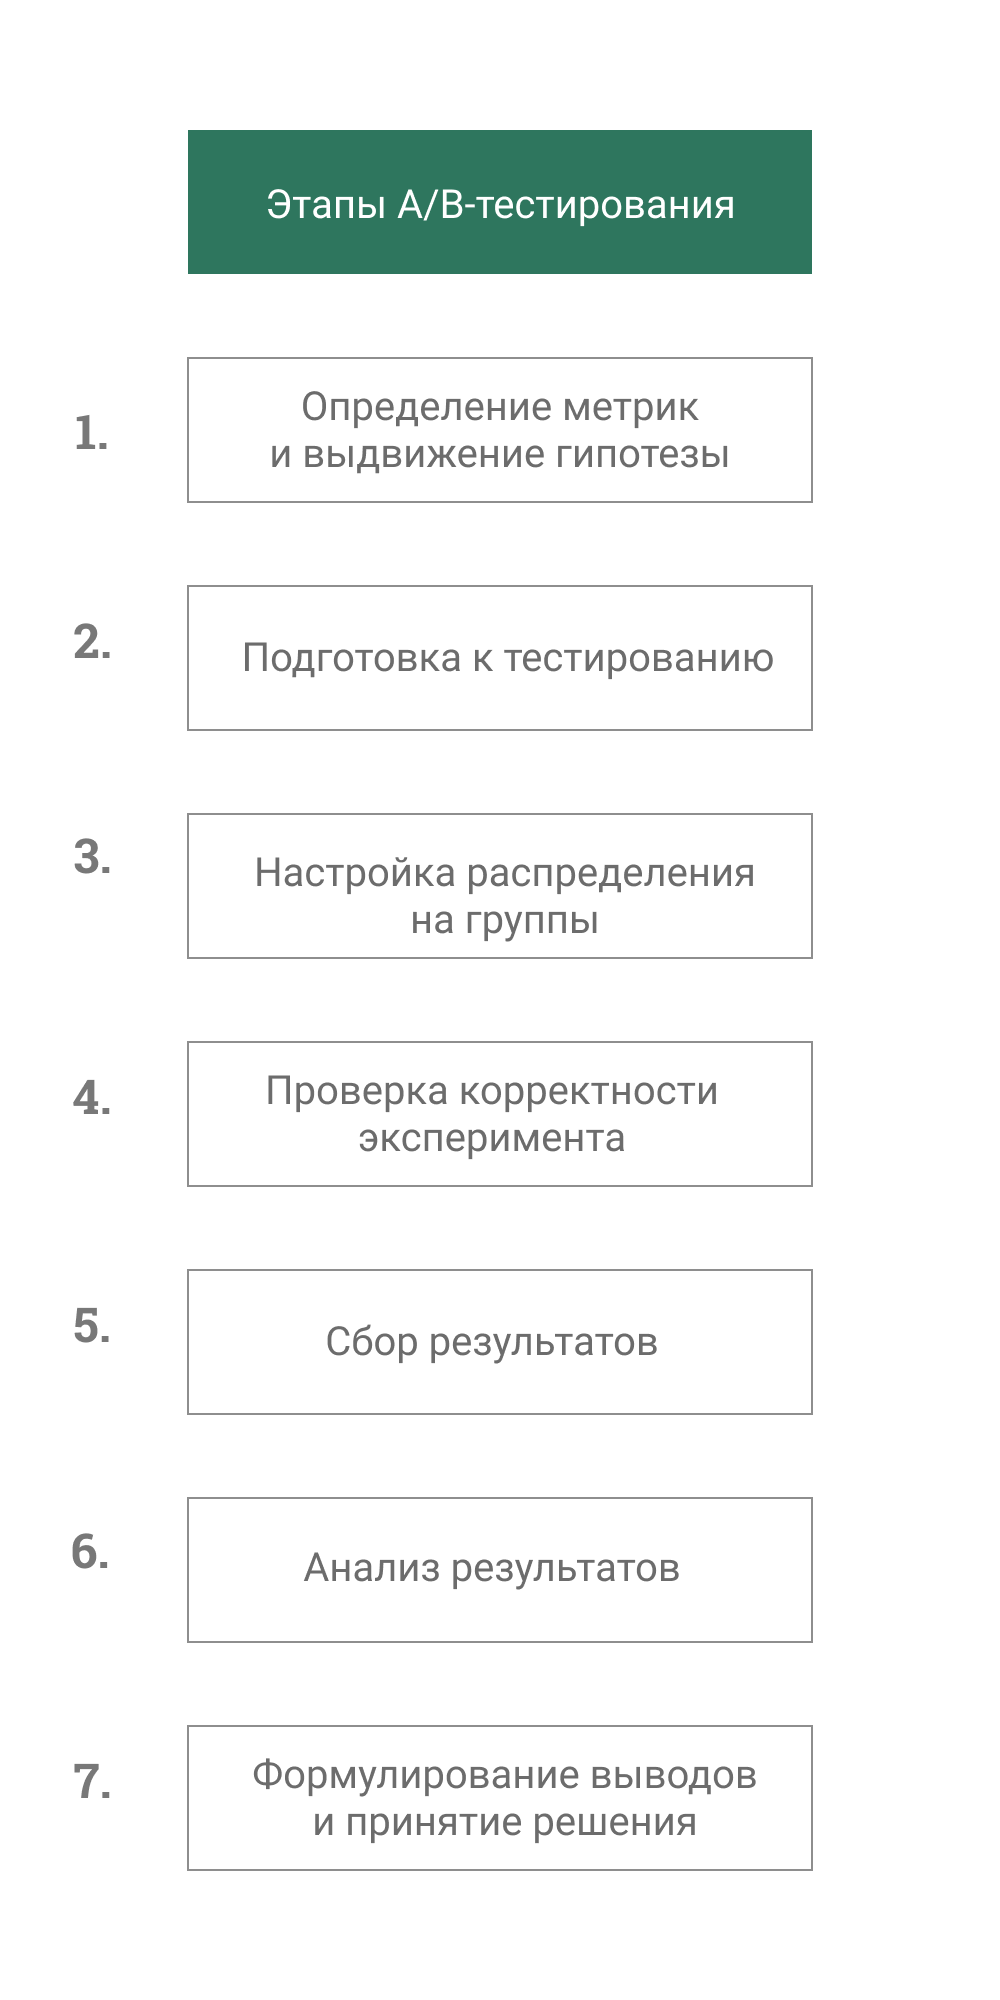

## 1. ОПРЕДЕЛЕНИЕ МЕТРИК И ВЫДВИЖЕНИЕ ГИПОТЕЗ

### На этом этапе мы определяем, какую метрику мы будем пытаться оптимизировать при внедрении варианта продукта B (дизайна, функциональности, модели, препарата и так далее). 

### Это могут быть специализированные метрики задач машинного обучения, если мы сравниваем две модели между собой, или маркетинговые и SMM-метрики: средний чек, конверсия покупки товара, количество лайков или репостов, количество просмотров, количество негативных комментариев, отток клиентов и так далее.

## При определении метрики важно соблюдать несколько правил:

✔️ Метрика должна быть измерима, то есть должна иметь численное выражение, и у вас должна быть возможность как можно более точно измерить этот показатель.

✔️ У вас есть возможность влиять на метрику.

## ⛔️ Плохие примеры метрик

+ Уровень счастья пользователя в момент совершения покупки (метрика неизмерима).
+ Курс доллара (вы не можете повлиять на курс доллара, только если ваша компания не является международным финансовым гигантом).

## **Примечание.** Очень часто в компаниях есть своя метрика, которая высчитывается специальным образом и включает в себя сразу несколько показателей.

### Итак, предположим, что в качестве метрики для нашей задачи оценки эффективности системы рекомендаций мы придумали свою комплексную метрику, которую назвали **«вовлечённость пользователей»**. Она измеряется от 0 до 100 и учитывает сразу несколько показателей: долю перешедших по рекламной ссылке пользователей, средний чек, конверсию покупки…

### Как только мы определились с метрикой, мы выдвигаем гипотезу о том, что вариант продукта B увеличит (уменьшит) нашу метрику на Z единиц. Если вы выбрали несколько метрик, то количество выдвигаемых гипотез должно быть не меньше количества метрик.

## Как и к метрике, к гипотезе тоже есть свои требования:

✔️ Гипотеза должна быть проверяемой, если предположение нельзя проверить, то это не гипотеза, а фантазия.

✔️ Гипотеза должна не иметь логических противоречий.

✔️ Должно быть понятно, на что влияет гипотеза, то есть она должна быть связана с конкретным показателем.

### ⛔️ Плохие примеры гипотез

+ «Добавление искусственного интеллекта в приложение уменьшит уровень стресса пользователей в 3 раза» (вы не можете проверить данную гипотезу, если вы не заставите пользователей принудительно проходить психологический тест на уровень стресса).
+ «Смена цвета кнопки продажи с красного на зелёный увеличит средний чек в 150 раз» (гипотеза является нереальной, дизайн не может так сильно влиять на показатель среднего чека).
+ «Цветные изображения товаров в приложении в 1,5 раза эффективнее, чем чёрно-белые» (непонятно, на что влияет гипотеза, к какой метрике она привязана, по какому критерию определяется «эффективность»).

### ✔️ Хорошие примеры гипотез

+ «Замена текущей модели SSD для детектирования предметов на модель семейства YOLO увеличит метрику IOU на 25 %».
+ «Новый дизайн сайта поможет увеличить конверсию для новых пользователей на 5 % и не ухудшит конверсию старым».
+ «Новый алгоритм ранжирования в рекомендациях в корзине увеличит итоговый средний чек на 3 %».


### Аналитики провели некоторое исследование и составили следующую гипотезу: «При внедрении персональных предложений вовлечённость пользователей увеличится на 10 %».

## 2. ПОДГОТОВКА К ТЕСТИРОВАНИЮ

Этот этап подразумевает проведение подготовительных мероприятий и включает в себя следующие компоненты.

### Определение размера выборки и длительности теста

Размер выборки имеет ключевое значение при проведении A/B-тестирования. Не собрав достаточную для тестирования выборку, мы получим результаты, которым попросту нельзя будет доверять, и эксперимент будет произведён впустую.

Рассмотрим пример.

Представим, что вы пытаетесь сравнить эффективность рекомендательной системы по выборке размером в 10 человек в каждой группе. При этом ваш интернет-магазин ежедневно посещают тысячи пользователей. Как можно судить о многотысячной аудитории по такой маленькой выборке? 

**Ответ**: никак.

**Размер выборки** определяется с помощью специальных статистических методов, для которых реализовано множество онлайн-калькуляторов.

Аналогично и с **длительностью теста**: чтобы быть уверенным в результатах тестирования, необходимо проводить тест на достаточном для этого отрезке времени. Длина данного временного отрезка также вычисляется с помощью статистических методов, и для этого есть специальные калькуляторы.

Примечание. О том, как вычислять размер выборки и длительность теста для конверсии, мы поговорим ниже.

Предположим, что мы вычислили необходимый размер выборки для нашей задачи, и он составил 29 000 посетителей, а также вычислили длительность проведения тестирования, и она составила 16 дней.

### Принятие решения о целесообразности проведения тестирования

На этом шаге мы производим оценку наших ресурсов и отвечаем на примерно следующие вопросы:

+ Хватит ли у нас ресурсов для проведения A/B-тестирования заданной длительности и с необходимым размером выборки?
+ Окупится ли проведение A/B-тестирования при внедрении варианта B?
+ Значителен ли предполагаемый эффект внедрения варианта продукта B для бизнеса?

### Разработка варианта B

На этом этапе мы занимаемся проектированием, разработкой и внедрением нового варианта нашего продукта по заявленному техническому заданию. Для этого этапа могут быть привлечены внешние специалисты.

Наш вариант B — это модернизированная с помощью подсистемы рекомендаций система рассылки предложений. Таким образом, на этом шаге мы разрабатываем DS-продукт — модель машинного обучения — и выводим её в продакшен, то есть внедряем её в систему рассылок предложений нашего заказчика.

## 3. НАСТРОЙКА РАСПРЕДЕЛЕНИЯ НА ГРУППЫ

### Когда новый вариант продукта уже разработан и готов к внедрению, необходимо распределить наших пользователей на группы А и B. 

### Этот этап намного сложнее, чем кажется, так как существует вероятность того, что полученные группы могут оказаться неравнозначны.

Вы должны постараться сделать так, чтобы группы были максимально схожи по всем возможным признакам. Идеального результата добиться никогда не получится, однако нужно попытаться учесть как можно больше факторов.

### ⛔️ Пример плохого разделения на группы

Представим, что вы разделили посетителей вашего сайта на две группы и пытаетесь сравнить конверсию покупки в этих группах. Допустим, вы учли геолокацию посетителей и разделили их так, чтобы в каждой группе было одинаковое количество пользователей из Москвы, Санкт-Петербурга, Саратова и так далее.

Но вот незадача: вы не учли тот факт, что пользователи приходят через различные маркетинговые каналы (через рекламу по ссылке, по советам друзей или находят вас целенаправленно).

Представим, что в группе B оказалось более половины клиентов, которые целенаправленно пришли к вам. Вполне логично, что такие клиенты более лояльны к вашей продукции и вероятность покупки ими вашего товара выше. Можно заранее с немалой уверенностью предположить, что в группе B конверсия покупки будет выше.

**Несбалансированное разделение выборки на группы** искажает результаты A/B-тестирования. Если пропустить доскональное исследование данных и не продумать разделение на группы, вы придёте к необходимости повторного проведения эксперимента.

### **Примечание**. Мы не будем углубляться в тонкости данного этапа, так как он очень индивидуален, и для каждой задачи придётся продумывать свои манипуляции с разделением аудитории. В этом модуле мы больше сосредоточимся на этапе анализа результатов A/B-тестирования.

### Если это необходимо, на этом этапе также проектируется место для хранения данных, возникающих в процессе проведения эксперимента.

### Представим, что мы спроектировали небольшую базу данных для нашего примера, куда записываем данные о каждом переходе клиентов по ссылке из рассылки, информацию о том, совершил ли пользователь целевое действие, и сумму его покупки, а также время, проведённое на сайте после перехода по ссылке.

## 4. ПРОВЕРКА КОРРЕКТНОСТИ ЭКСПЕРИМЕНТА

### На этом этапе мы проверяем, что все условия для проведения эксперимента работают корректно:

+ группа А использует (видит) вариант продукта А, а группа B использует (видит) вариант продукта B; отсутствуют пересечения между этими группами;
+ отсутствует внезапное влияние внешних факторов (не появляются неожиданные масштабные события, которые могут повлиять на результаты эксперимента);
+ результаты централизованно поступают в подсистему хранения данных о процессе проведения эксперимента (если такая предусмотрена);
+ другие специфичные условия.

### В случае нашей задачи при проведении эксперимента мы должны проверить, что клиенты получают рекламу, а персональные предложения работают корректно. Также мы должны следить за тем, чтобы сообщения поступали в одинаковые промежутки времени, пристально наблюдать за резкими скачками «вовлечённости» наших клиентов, если такие возникают.

## 5. СБОР РЕЗУЛЬТАТОВ

### Когда процесс тестирования доходит до своей финальной точки, нам необходимо выгрузить результаты: данные об изменении целевого показателя (метрики) на заданном промежутке времени.

Итак, представим, что мы выгрузили данные о показателях, на основе которых будет считать нашу метрику («вовлечённость») из спроектированной базы.

## 6. АНАЛИЗ РЕЗУЛЬТАТОВ

### На этом этапе мы производим сравнение метрик в двух группах на основе собранных данных. Для этого могут использоваться методы визуализации и визуальное сравнение показателей («на глаз»).

### Однако, когда значимость разницы показателей неочевидна, то есть нельзя с большой долей уверенности сказать, какой вариант продукта (А или B) оказался «лучше», мы должны воспользоваться **статистическими тестами**. Они позволяют с заданным уровнем значимости ответить на вопрос: имеет ли статистическую значимость полученная разница в показателях или же она является случайной?

### Помимо статистических тестов, для анализа результатов часто используются **доверительные интервалы**, которые позволяют построить возможные границы для истинного значения метрики в группах и для разницы между показателями в группах.

Мы рассмотрим реализацию этапа анализа результатов A/B-тестирования на Python в следующем юните и подробно разберём все тонкости определения статистической значимости результатов.

### Предположим, что в результате анализа данных проведённого A/B-тестирования для системы персональных рекомендаций выяснилось, что «вовлечённость» пользователей группы B на 3 % выше, чем та же метрика для группы А. Статистический тест и доверительный интервал для разницы «вовлечённостей» показали, что данная разница является статистически значимой. А значит, пора переходить к выводам!

## 7. ФОРМИРОВАНИЕ ВЫВОДОВ И ПРИНЯТИЕ РЕШЕНИЯ

### На основании анализа результатов A/B-тестирования мы принимаем или отклоняем первоначальную гипотезу и формируем один из трёх возможных выводов:

1. Вариант продукта А является более эффективным (по заданной метрике), чем вариант B.
2. Вариант продукта B является более эффективным (по заданной метрике), чем вариант А.
3. Варианты А и B являются идентичными, то есть между ними нет разницы с точки зрения заданной метрики.

### Когда сделан вывод, сформирован отчёт о проведении A/B-теста и его результатах, принимается решение о внедрении варианта B или необходимости дальнейшего исследования.

+ Хотелось бы отметить, что не существует хорошего или плохого результата. Цель A/B-тестирования — это сделать верные выводы в целях рационального использования средств бизнеса. Если в результате получилось так, что новый вариант не оправдал себя, нужно с чистой совестью принять такой исход событий.

### Итак, по итогам нашего вымышленного A/B-тестирования мы приходим к тому, что новая система рассылки предложений с внедрённой в неё моделью для подбора персональных рекомендаций является эффективной, и это доказано результатами эксперимента.

### Однако следует помнить о том, что статистические методы проверки гипотез не являются абсолютно точными и могут гарантировать результат только с заданным уровнем значимости. Поэтому существует вероятность, что даже при соблюдении всех условий эксперимента вы допустите ошибку I или II рода. 

### → При организации A/B-тестирования очень важно помнить о нескольких принципах проведения эксперимента. Следуя принципам A/B-тестирования, вы снижаете шансы допустить ошибку при организации эксперимента, если на вас ляжет такая ответственность. Давайте их рассмотрим.

# ПРИНЦИПЫ A/B-ТЕСТИРОВАНИЯ

## ПРИНЦИП 1: ИСКЛЮЧИТЬ ВЛИЯНИЕ ИЗВНЕ

### Как уже отмечалось, для качественного результата тестирования необходимо разделить группы так, чтобы пользователь, который попал в одну из групп, в течение всего теста находился только в ней. Это даёт нам уверенность в том, что на принятие решения о совершении целевого действия его подтолкнул только тот вариант продукта, который был ему показан.

### В идеале на пользователя вообще не должны оказывать влияние никакие внешние факторы, будь то конкуренция, экономические и социальные изменения (вспомним COVID-19), сезонность и так далее.

На практике сделать это крайне тяжело: мы не можем влиять на акции, которые проводят наши конкуренты, или на пользователя, который может заходить на наш сайт с разных устройств и видеть разные версии сайта, предназначенные для разных групп теста.

### Если всё-таки оказалось так, что некоторые пользователи попали в обе группы теста, то нужно смотреть на их количество. Как правило, если их число невелико (менее 5-10 %), их исключают из анализа.

### Поэтому крайне важно правильно рассчитать длительность теста, чтобы накопить достаточное количество данных для принятия правильного решения!

## ПРИНЦИП 2: ДАННЫХ ДОЛЖНО БЫТЬ МНОГО

### Согласно закону больших чисел, чем больше раз повторяется эксперимент, тем ближе будет частота события к его вероятности.

### Иначе говоря, если наблюдений мало, их разброс будет больше, а если наблюдений много, случайные выбросы будут друг друга компенсировать.

### Давайте рассмотрим пример.

Когда мы подбрасываем монетку, то с одинаковой вероятностью может выпасть как орёл, так и решка. Вероятность каждого исхода — 50 %.

Даже если в начале эксперимента пять раз подряд выпал орёл, то с увеличением количества повторений (например, если мы решим подбросить монетку 10 000 000 раз) подобные выбросы компенсируют друг друга и количество выпавших орлов и решек будет одинаково.

### Поэтому данных и должно быть много!

## ПРИНЦИП 3: ПРАВИЛЬНЫЙ ИНСТРУМЕНТ АНАЛИЗА

### Как мы уже говорили, проверка гипотез — статистический инструмент. Она позволяет судить о больших совокупностях по меньшим выборкам.

### То есть, измеряя результаты групп A и B, мы на самом деле хотим понять различие не самих этих групп (выборок), а различие генеральной совокупности (всех пользователей).

И статистика даёт нам такую возможность! По выборке мы можем судить о реальном среднем значении всей генеральной совокупности.

### Важно определиться с показателями, по которым производится сравнение в группах, и правильно выбрать статистические инструменты (тип теста и доверительного интервала) для проверки гипотезы. Неправильные инструменты — неверный результат.

### Обычно, проводя тестирование, группы разделяют равномерно — 50/50. То есть ровно половина пользователей видит вариант A, а вторая половина — вариант B. Однако также допускается разделять группы в других пропорциях, например 70/30.

### Также можно проводить множественные сравнения: когда аудитория делится не на две группы, а на большее количество, и каждая видит разные варианты. Такие исследования называют множественным тестированием, или A/B/C-тестированием.

# РАСЧЁТ ПАРАМЕТРОВ A/B-ТЕСТА

### Для расчёта размера выборки и длительности проведения теста обычно используют специальные калькуляторы. В интернете можно найти много подобных калькуляторов. Мы рассмотрим некоторые их них.

### Калькулятор Эвана Миллера (https://www.evanmiller.org/ab-testing/sample-size.html)

### Поможет определить размер выборки для задачи повышения конверсии в группах.

### Например, вы пытаетесь повысить долю пользователей, которые переходят на ваш сайт по рекламе в соцсетях или повышаете конверсию действия «добавить товар в корзину».

### На вход подаются такие параметры, как:

+ Baseline Conversion Rate: базовая конверсия (конверсия существующего варианта);
+ Minimum Detectable Effect: минимально желаемый результат изменения метрики (относительно базовой конверсии или абсолютный);
+ Statistical Power 1−β: мощность теста (вероятность не допустить ошибку II рода);
+ Significance Level α: уровень значимости (вероятность ошибки I рода).

### Подставив необходимые параметры, получим размер выборки для каждой из групп теста. 

✏️ Попробуйте воспользоваться этим калькулятором для решения следующей задачи.

## Задание 3.7

Вы тестируете форму ввода личных данных клиента. В исходной версии клиент должен обязательно указать номер телефона, имя и адрес, а в новой версии обязательным для заполнения является только поле с номером телефона (имя и адрес можно не оставлять).

Вам необходимо рассчитать размер выборки для A/B-теста сценария оформления заказа на сайте.

У вас есть данные за год (365 дней). Вы знаете, что из 2 000 000 пользователей, которые открыли эту форму за год, 600 000 пользователей заполняли её.

Вы ожидаете, что новая форма покажет минимальное увеличение конверсии относительно базовой в 5 % (опция Relative). Рассчитайте необходимый размер выборки при мощности теста в 80 % и уровне значимости в 5 %.

Вычислите необходимый размер выборки посетителей страницы.

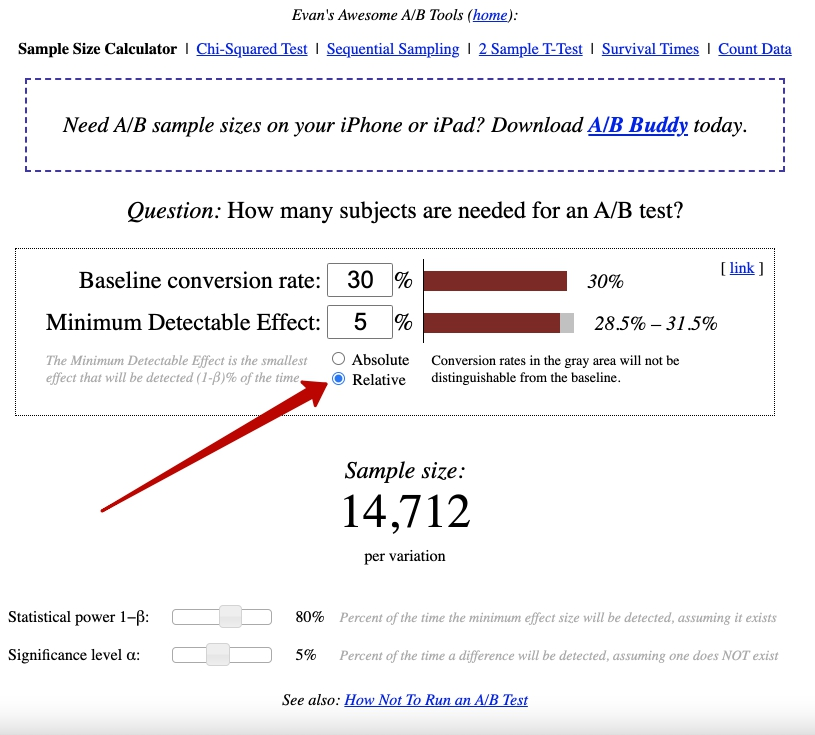

### Калькулятор VWO (https://vwo.com/tools/ab-test-duration-calculator/)

### Позволит рассчитать длительность теста для получения статистически значимого результата. Калькулятор используется для задач повышения конверсии.

### На вход подаются следующие данные:

+ Estimated Existing Conversion Rate (%): базовый уровень конверсии;
+ Minimum Improvement in Conversion Rate you want to detect (%): минимально желаемый результат изменения метрики;
+ Number of Variations/Combinations (including control): общее количество групп в тесте;
+ Average Number of Daily Visitors: среднее ожидаемое количество посетителей в день в обеих группах;
+ Percent Visitors Included in Test: процент посетителей, включенных в тест.

### Подставив необходимые параметры, получим необходимую длительность теста.

✏️ Попробуйте воспользоваться этим калькулятором для решения следующей задачи.


## Задание 3.8

Вы тестируете новую версию системы рекомендаций товаров. Версии сравниваются по конверсии действия «добавить товар в корзину».

Вам необходимо рассчитать размер выборки для A/B-теста сценария оформления заказа на сайте.

Вы знаете, что в среднем на сайт интернет-магазина ежедневно заходит 6 000 пользователей. Из них в среднем 720 пользователей добавляют товар из рекомендуемых в корзину.

Вы ожидаете, что новая рекомендательная система покажет минимальное увеличение конверсии относительно базовой в 5 %. В тестирование вовлечены все пользователи.

Рассчитайте необходимую длительность A/B-теста и запишите количество дней.

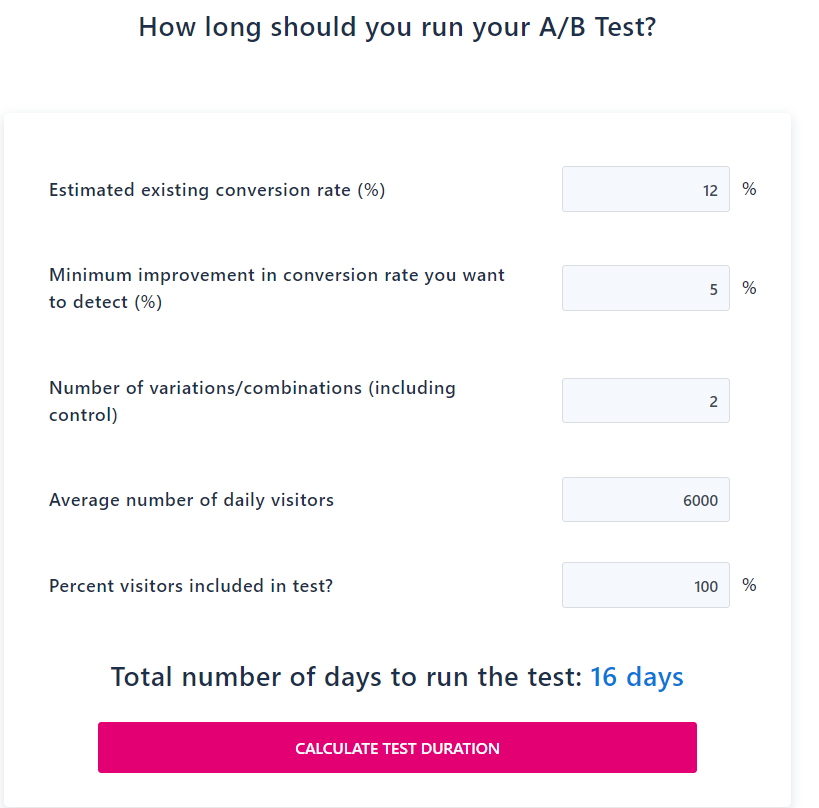

# 4. Анализ результатов A/B-тестирования: кумулятивные метрики

Итак, давайте рассмотрим, как проводится анализ результатов A/B-тестирования (в нашем алгоритме он был обозначен под номером 6) с помощью Python.

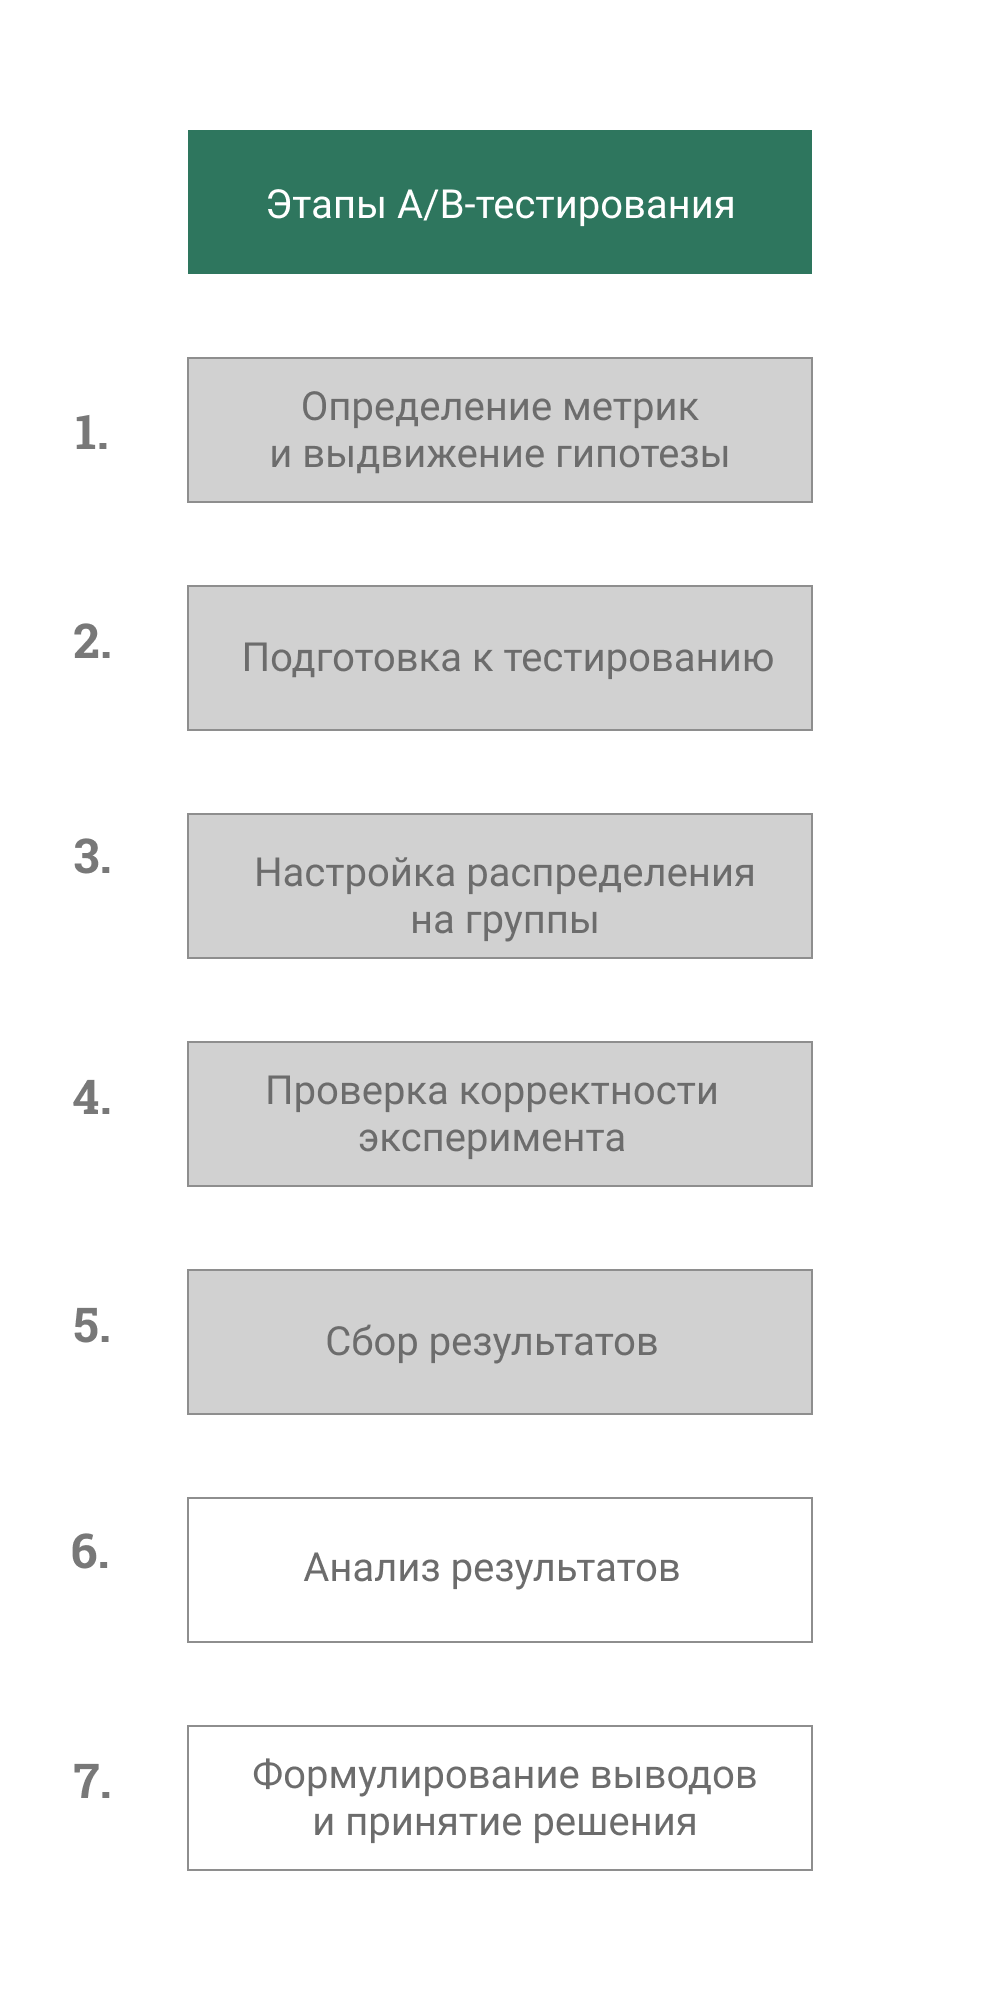

### В качестве примера давайте попробуем решить задачу об анализе конверсии на некотором интернет-магазине, который занимается продажей различных товаров. Другие возможные задачи анализа результатов A/B-тестирования решаются похожим образом с учётом специфичности рассматриваемой метрики, длительности тестирования и характера распределения целевого показателя.

## ОПИСАНИЕ ЗАДАЧИ

### Проводится A/B-тестирование для двух вариантов рекомендаций сопутствующих товаров в профиле товара некоторого интернет-магазина. 

+ **Вариант 1.** Дополнительные товары рекомендуются на основе статистических данных уже совершённых покупок — товары, которые другие пользователи часто покупают с основным. 
+ **Вариант 2.** Дополнительные товары рекомендуются на основе совершённых пользователем ранее покупок с помощью ML-модели.

### Варианты сравниваются по доле пользователей, которые добавляют хотя бы один из предложенных товаров в корзину (метрикой является конверсия действия «добавить в корзину сопутствующий товар»).

### Для этого пользователи были разделены на две группы. 

+ **Контрольной (группе А)** доступен первый вариант рекомендаций.
+ **Тестовой (группе B)** доступен второй вариант.

### Предполагается, что все условия и принципы проведения A/B-теста были соблюдены, то есть:

✔️ выборка имеет достаточный для принятия решения объём;

✔️ выбран достаточный интервал времени для тестирования;

✔️ группы максимально сбалансированы;

✔️ внешнее вмешательство минимально.

Итак, в результате проведения A/B-тестирования были получены следующие данные:

### На основании этих данных нам предстоит сделать вывод о том, какой из вариантов рекомендаций (А или B) является более эффективным по показателю конверсии.

## ЗНАКОМИМСЯ С ДАННЫМИ

Прежде, чем переходить к этапу анализа, необходимо совершить некоторые преобразования над данными, для этого импортируем библиотеки, которые нам пригодятся:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ab_data = pd.read_csv('ab_data.csv')

In [ ]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


### Итак, мы получили таблицу со следующими полями:

+ user_id: идентификатор пользователя, зашедшего на сайт
+ timestamp: дата события
+ group: группа теста (контрольная или тестовая)
+ converted: совершил пользователь целевое действие (нажатие кнопки «добавить в корзину» на сопутствующем товаре) или нет. 1 — да, 0 — нет.


In [ ]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


### Итак, в наших данных нет пропусков, однако нам нужно перевести столбец с информацией о дате события (timestamp) в формат datetime. Напомним: для этого мы можем воспользоваться функцией pandas to_datetime:

In [ ]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

### В итоге мы получили таблицу, в которой отображены входы клиента на сайт (сессия) и его действия. Для того, чтобы получить показатель конверсии в группах на каждый день, нам необходимо предварительно сгруппировать наши данные по дате и группе и вычислить количество пользователей, заходивших на сайт, и суммарное количество совершённых целевых действий. 

### Дополнительно для удобства сбросим индекс на сгруппированной таблице c помощью метода reset_index() и переименуем столбец user_id в users_count с помощью метода rename().

In [ ]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


### **Примечание.** Количество пользователей в день в контрольной и тестовой группе определяется как количество значений в столбце user_id в сгруппированных данных, а количество совершённых целевых действий — это просто сумма по столбцу converted (1 в строке означает положительный исход, то есть целевое действие было совершено, а 0 — отрицательный исход; просуммировав все 1 и 0 в группе, получим количество положительных исходов).

### Для завершения этапа подготовки данных к анализу нам осталось рассчитать конверсию на каждый день проведения A/B-тестирования. Напомним: ежедневная конверсия рассчитывается как отношение числа посетителей сайта, выполнивших на нём какие-либо целевые действия в день, к ежедневному общему числу посетителей сайта, умноженная на 100 %:



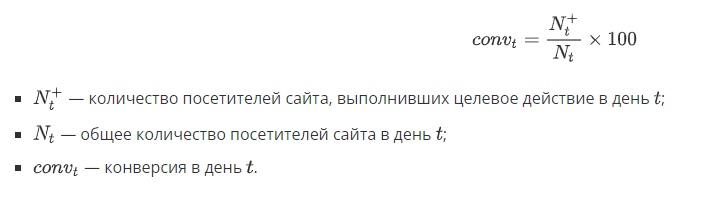

## Задание 4.1

Рассчитайте конверсию на каждый день по приведённой формуле. Результат занесите в столбец conversion. Чему была равна конверсия (в процентах) в группе А 5 января 2017 года? Ответ округлите до второго знака после запятой.

In [ ]:
daily_data['conversion'] = daily_data['converted']/daily_data['users_count'] * 100
print(round(daily_data[
    (daily_data['timestamp'] == '2017-01-05') & (daily_data['group'] == 'A')
]['conversion'], 2))
display(daily_data.head())

6    12.32
Name: conversion, dtype: float64


,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


In [ ]:
daily_data['conversion'] = daily_data['converted']/daily_data['users_count'] * 100
print(round(daily_data[
    (daily_data['timestamp'] == '2017-01-05') & (daily_data['group'] == 'A')
]['conversion'], 2))
display(daily_data.head())

6    12.32
Name: conversion, dtype: float64


,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


# ВИЗУАЛЬНЫЙ АНАЛИЗ КОНВЕРСИИ В ГРУППАХ

### Нам необходимо ответить на вопрос: в какой группе (А или B) показатель конверсии был выше, и на этой основе принять решение о том, какой из вариантов более эффективный. 

### Давайте построим диаграмму boxplot для сравнения параметров распределения ежедневной конверсии по группам. 

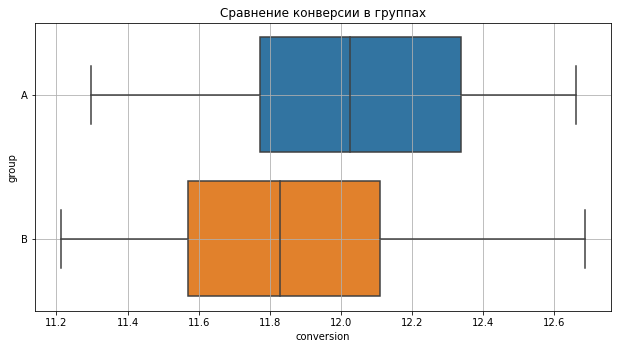

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

## **Что можно сказать исходя из этого графика?** Во-первых, медианное значение ежедневной конверсии в группе А, выше, чем в группе B. Во-вторых, разброс конверсии в группе B несколько больше, чем в группе A.

### Тут неопытный специалист воскликнет: версия рекомендаций А лучше, чем версия B (медиана конверсии варианта А больше, да и разброс поменьше, то есть конверсия более стабильна) — и завершит эксперимент. 

### Но выводы делать ещё рано! И сейчас попробуем понять, почему. 

### **Примечание.** Прежде чем делать выводы по визуальному представлению данных, всегда обращайте внимание на численные значения показателей. Они могут различаться в масштабе графика, но на практике разница между ними не будет иметь значения. Также всегда стоит убедиться, что в данных нет выбросов (базовый вариант — сравнить медиану и среднее между собой). Далее мы ещё поговорим о стабилизации показателя во времени.

### Давайте вычислим средний и медианный показатель конверсии в контрольной и тестовой группе и умножим результат на 100 (получим результат в процентах):

In [ ]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


### Из полученной таблицы видно, что медиана и среднее в каждой группе практически совпадают. При этом разница между показателями в группах менее 0.3 %! 

### Возникает вопрос: а значима ли вообще такая разница в показателях или она обусловлена случайностью, и варианты A и B одинаково эффективны по метрике конверсии?

### Прежде чем отвечать на этот вопрос, нам нужен ответ на другой вопрос: а стабилен ли показатель конверсии в группах во времени или он колеблется как «уж на сковородке»? 

## **Примечание.** Вопрос о стабильности метрик является обязательным. Прогонять результаты через статистические тесты можно только после того, как вы убедитесь, что разница в ваших показателях стабилизировалась во времени. Это связано с проблемой подглядывания, речь о которой пойдёт ниже.

Тут нам помогут кумулятивные метрики.

# КУМУЛЯТИВНЫЕ МЕТРИКИ

### В течение всего теста рекомендуется отслеживать поведение целевых метрик. Для этого чаще всего используются кумулятивные метрики.

### **Кумулятивная метрика** — это отображение целевой метрики, когда вы отслеживаете её поведение за каждый день — накопленным итогом по дням. 

## ПОЧЕМУ ЭТО ВАЖНО?

### Ранее мы говорили, что для принятия решения в A/B-тестировании требуется большой объём данных, что соотносится с законом больших чисел: чем больше данных — тем ближе получаемый результат к математическому ожиданию (истинному среднему). 

Вспомните пример про подбрасывание монетки. Если подбросить монетку 10 раз, то велика вероятность, что один из двух результатов будет значительно превышать второй. Но если подбросить её 1 000 раз, то результаты компенсируют друг друга, и мы увидим, что итог крайне близок к разделению 50/50 (количество выпавших орлов и решек будет практически одинаковым).

### Так же и в A/B-тестировании: с самого начала любой из вариантов может показывать лучшие результаты, и статистическая значимость может быть достигнута уже в первые дни теста. Это явление называется **проблемой подглядывания.**

## **Важно! Не стоит торопиться: как минимум дождитесь накопления запланированных объёмов выборки и длительности теста. Но и тут не стоит заканчивать тест — проверьте, стабилизировались ли метрики!**

### То есть в начале теста любой полученный за день результат будет оказывать сильное влияние на результат теста. Но со временем данные будут накапливаться, и доля получаемых за день данных будет всё меньше и меньше воздействовать на уже накопленный результат. 

Кумулятивный график конверсии может выглядеть, например, так: 



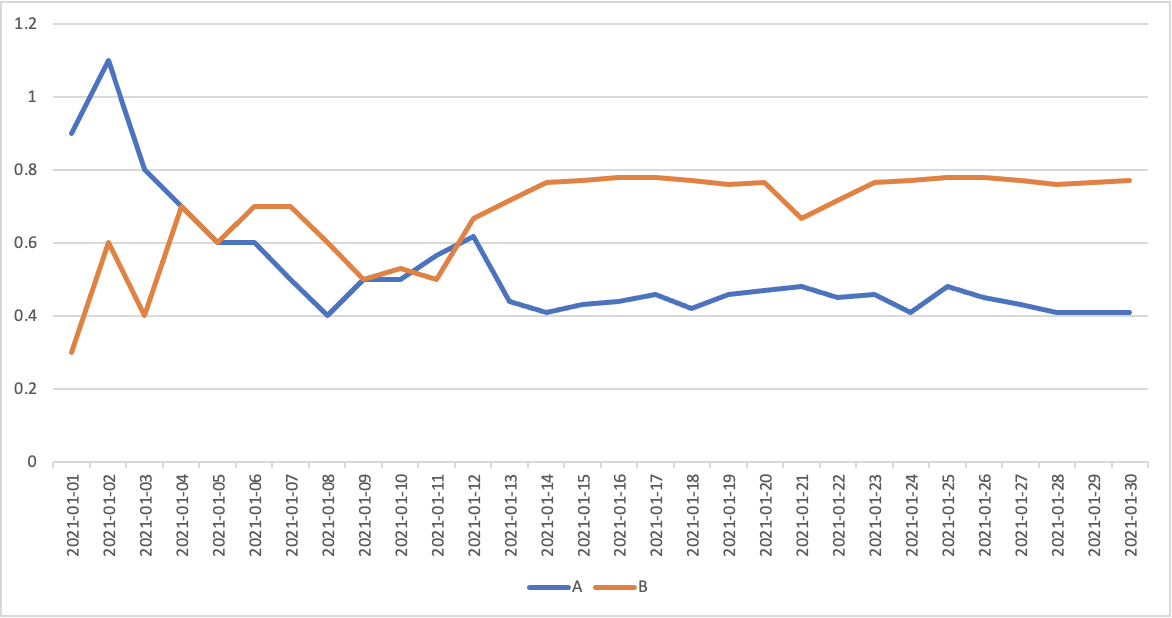

### Как видите, в начале данные подвержены сильному колебанию, но со временем они выравниваются.

## **Примечание.** Кумулятивная метрика считается стабилизированной, когда на графике прекращаются резкие пики и спады показателя, и линия постепенно выравнивается в горизонтальную прямую.

## **Важно!** Принимать какие-либо решения стоит только после того, как метрика стабилизируется!

### Согласно центральной предельной теореме и закону больших чисел, с увеличением объёма данных метрика стабилизируется и будет стремиться к реальному среднему. 

## **Примечание.** В качестве кумулятивной метрики можно считать не только конверсию, но и выручку, средний чек, количество заказов, процент негативных комментариев, точность модели и так далее.

Итак, давайте применим новые знания к нашим данным и вычислим кумулятивную конверсию, а затем построим её график. 

### Но для начала ради эксперимента посмотрим, как вообще изменялись показатели ежедневной конверсии в каждой группе во времени. Для этого построим линейные графики для каждой группы: по оси абсцисс отложим дату, а по оси ординат — показатель конверсии:

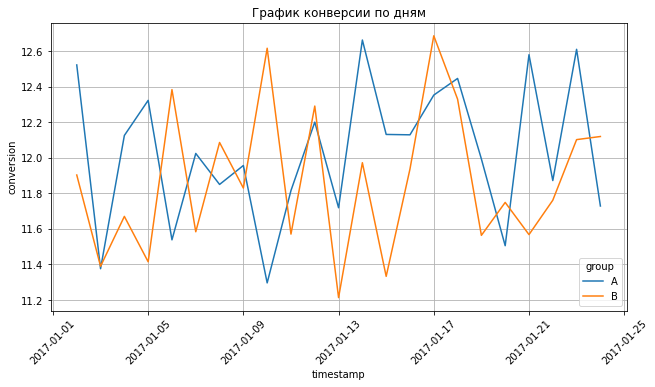

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

### **Что можно сказать по такому графику?** Да практически ничего! Конверсия у обеих групп «скачет» день ото дня. Понять, какая из групп лучше, — практически невыполнимая задача. 

### Именно поэтому и принято смотреть график кумулятивной конверсии, где за каждый день отображаются данные накопленным итогом.

+ Для расчёта кумулятивного показателя суммы в Pandas есть специальный метод cumsum(). Давайте посмотрим, как он работает — сначала на данных о ежедневном количестве посетителей для группы А. 

### Выберем данные для группы А и создадим в полученной таблице новый столбец cum_users_count, в который запишем результат работы метода cumsum() по столбцу users_count:

In [ ]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


### Обратите внимание, что в столбце с кумулятивной суммой за 2017-01-03 указано 9 435 пользователей. Сложите данные за 2017-01-02 и 2017-02-03 из столбца users_count — получите те же 9 435. Аналогично и для других дней. 

### То есть кумулятивная сумма — это накопительная сумма; каждое её значение — это результат сложения показателя за предыдущие дни с показателем за текущий день. 

Кумулятивную сумму можно записать в виде рекурсивной формулы:

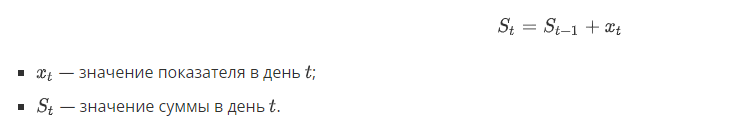

### Как сделать такой расчёт для двух групп (А и B) сразу? Воспользуемся методом groupby: сгруппируем данные по признаку группы, и в каждой группе будем вычислять кумулятивные суммы признаков количества посетителей (users_count) и количества совершённых целевых действий (converted). 

### После этого рассчитаем **кумулятивную конверсию** — это отношение ежедневной кумулятивной суммы количества посетителей к ежедневной кумулятивной сумме количества совершённых целевых действий:

In [ ]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


### А теперь построим графики кумулятивной конверсии по дням в каждой группе:

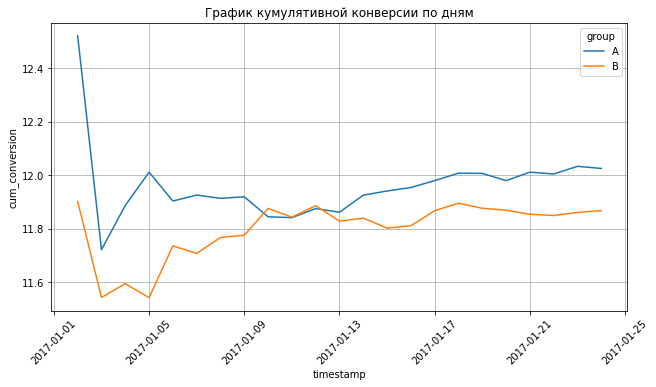

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

### **Что можно сказать теперь?** До 2017-01-09 конверсия была нестабильна, но после 2017-11-01 резкие скачки прекратились (кривая графика переходит в прямую). Судя по графику, конверсия группы B стабильно хуже конверсии группы А на всём промежутке времени. 

### Обратите внимание на различие в конверсии в первые дни теста: тут наглядно отображена проблема подглядывания, когда статистическая значимость ошибочно могла быть достигнута уже в самом начале теста.

### На основании стабилизированного кумулятивного графика мы можем сделать вывод, что длительность эксперимента была достаточной для того, чтобы судить о статистической значимости разности между показателем конверсии в группах.

⭐️ Значит, мы можем переходить к проведению статистических тестов. Но прежде предлагаем решить несколько заданий.

## ВВОДНЫЕ ДАННЫЕ ДЛЯ ЗАДАЧ 4.6–4.9

### Проводится A/B-тестирование для двух вариантов дизайна сайта. Результаты тестирования собраны в двух файлах (данные для группы А и для группы B).

### Каждая таблица имеет следующие поля:

+ date — дата наблюдения;
+ cid — идентификатор посетителя;
+ transactions — количество совершённых целевых действий (транзакций);
+ revenue — сумма покупки;
+ group — группа (тестовая — А, контрольная — B).

### Используйте эти данные для ответа на следующие вопросы.

## Задание 4.6

Постройте таблицу со следующими ежедневными показателями:

+ количество посетителей сайта;
+ суммарное число транзакций;
+ общая сумма покупок (выручка).

Для этого сгруппируйте данные по признаку date, предварительно преобразовав его к типу datetime.

Чему равны значения ежедневных показателей в группе А на 8 ноября 2020 года?

Количество посетителей сайта:

In [ ]:
sample_a = pd.read_csv('ab_test-redesign_sample_a.csv')
sample_b = pd.read_csv('ab_test-redesign_sample_b.csv')

In [ ]:
df = pd.concat([sample_a, sample_b])

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [ ]:
df_daily = df.groupby(['group','date']).agg({
    'cid':'count',
    'transactions':'sum',
    'revenue':'sum'
    }).reset_index().rename(columns={'cid':'users_count'})


In [ ]:
df_daily.head()

,group,date,users_count,transactions,revenue
0,A,2020-11-06,2576,16,1577279
1,A,2020-11-07,2704,23,1721886
2,A,2020-11-08,3354,25,846051
3,A,2020-11-09,3234,18,708830
4,A,2020-11-10,3022,29,826984


## Задание 4.7

### Добавьте в каждую из таблиц кумулятивные метрики:

+ кумулятивное количество посетителей сайта;
+ кумулятивное суммарное число транзакций;
+ кумулятивная общая сумма покупок (кумулятивная выручка).

### Рассчитайте кумулятивную конверсию действия покупки (в процентах) и кумулятивный средний чек (кумулятивная выручка/кумулятивное суммарное число транзакций).

### Чему равна средняя кумулятивная конверсия в группах за весь период проведения A/B-теста? Ответ округлите до сотых, знаки процентов не вводите.

In [ ]:
df_daily['cum_users_count'] = df_daily.groupby(['group'])['users_count'].cumsum()
df_daily['cum_transactions'] = df_daily.groupby(['group'])['transactions'].cumsum()
df_daily['cum_revenue'] = df_daily.groupby(['group'])['revenue'].cumsum()

In [ ]:
df_daily['cum_conversion'] = df_daily['cum_transactions'] / df_daily['cum_users_count'] * 100
df_daily[df_daily['group'] == 'A']['cum_conversion'].mean()


0.7127554606160045

In [ ]:
df_daily[df_daily['group'] == 'B']['cum_conversion'].mean()

0.7621783890588011

## Задание 4.8

Постройте графики кумулятивной конверсии в каждой группе. Какие выводы по ним вы можете сделать?

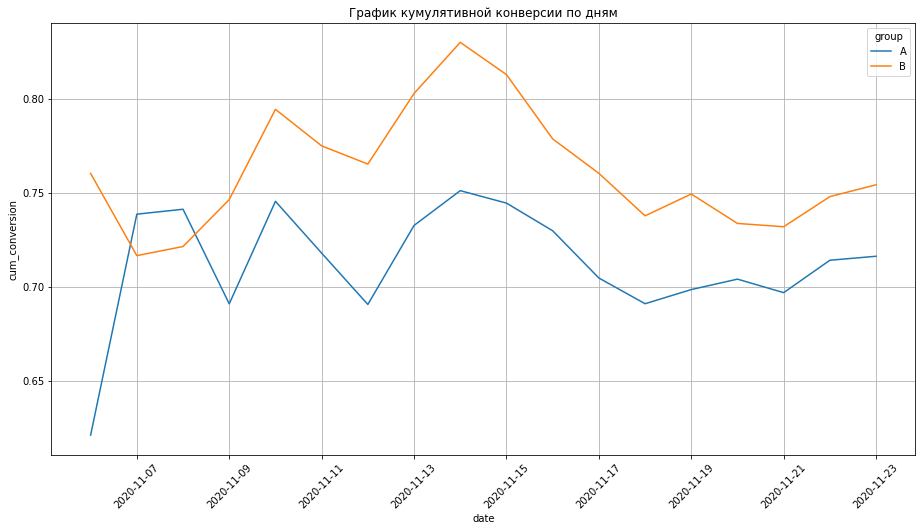

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(12, 6))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=df_daily, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

### Начиная с 9 ноября 2020 года конверсии в группах имеют приблизительно идентичное поведение (одинаковые точки роста и спада). При этом конверсия в группе B стабильно выше конверсии в группе A на данном периоде.

## Задание 4.9

Постройте графики кумулятивного среднего чека в каждой группе. Какие выводы по ним вы можете сделать?

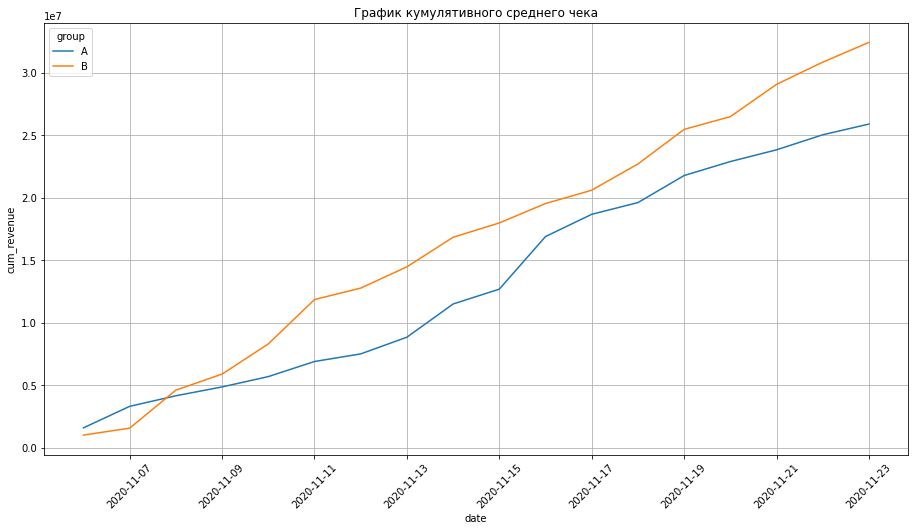

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(12, 6))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_revenue', data=df_daily, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивного среднего чека')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

### В начале периода наблюдения средний чек в группе B был меньше, чем средний чек в группе A. Однако при стабилизации метрик наблюдается обратный результат.

# 5. Анализ результатов A/B-тестирования: статистические тесты

### → В прошлом модуле мы рассматривали различные статистические тесты и их использование в Python. Суть статистических тестов заключается в том, чтобы удостовериться в справедливости некоторой гипотезы или опровергнуть её на основе предоставленных данных (**выборки**).

А мы как раз этим с вами и занимаемся! 

### Наша задача состоит в проверке гипотезы о различиях (равенстве) между истинными конверсиями в группах, исходя из выборочных конверсий. Мы хотим ответить на вопрос: «А существует ли статистическая значимость в эффективности (по конверсии) контрольного и тестового варианта?». 

## СТАТИСТИЧЕСКИЙ ТЕСТ ДЛЯ КОНВЕРСИИ

### Оказывается, интересующий нас признак того, осуществлена конверсия пользователя или нет, — это случайная величина, имеющая распределение Бернулли. Такая случайная величина имеет два возможных исхода: 

+ успех (1) — пользователь осуществил конверсию (**совершил целевое действие**); 
+ неуспех (0) — пользователь не осуществил конверсию.

### Мы помним, что конверсия — это доля (пропорция) пользователей, которые добавили сопутствующий товар в корзину. То есть истинная конверсия — вероятность «успеха» (традиционно обозначают как p), или вероятность того, что пользователь совершит целевое действие.

### Для проверки гипотезы равенства пропорций мы можем воспользоваться уже знакомым нам z-критерием для пропорций. Этот критерий является наиболее популярным для задачи определения статистической значимости изменения конверсии.

### Примечание. Здесь и далее, когда мы говорим о равенстве, мы не имеем в виду фактическое равенство показателей (2=2). Мы хотим узнать, есть ли статистическое различие между полученными значениями. Но для простоты изъяснения обычно говорят просто о равенстве или неравенстве.

Например, мы можем иметь конверсию в 4 % для одной группы и в 4.5 % для другой. Фактически показатели не равны. Но это не говорит о том, что конверсия для другой группы лучше — возможно, подобное отклонение в пределах допустимого для рассматриваемых данных, и тогда речь о статистическом различии идти не может.

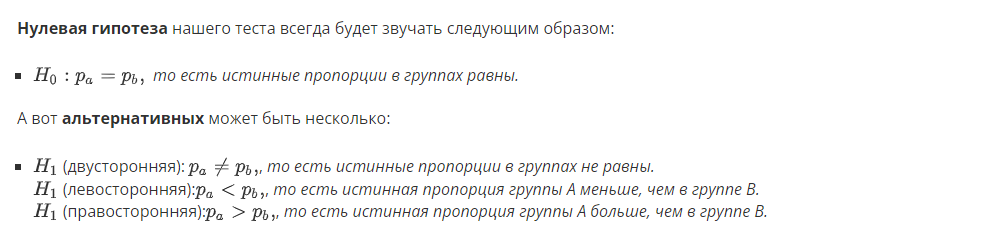

### ✏️ Применим z-тест для пропорций на примере конверсии нашего интернет-магазина. 

Импортируем функцию proportions_ztest() из модуля statsmodels:

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

### Напомним, что для получения z-статистики и p-value нам необходимо передать в функцию следующие аргументы:

+ *count* — количество «успехов» (в каждой из групп). В нашем случае — количество пользователей, которые совершили целевое действие в каждой группе.
+ *nobs* — количество наблюдений (в каждой из групп), то есть размер выборки.
+ a*lternative* — альтернативная гипотеза. Может быть: *'two-sided'* — двусторонняя, *'smaller'* — левосторонняя, *'larger'* — правосторонняя. По умолчанию параметр равен *'two-sided'*. 

### ✏️ Итак, сгруппируем данные по признаку группы и рассчитаем количество «успехов» (сумма по столбцу converted) и общее количество наблюдений (количество непустых значений в столбце converted) для каждой группы.

In [ ]:
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,17467,145241
B,17238,145241


### Теперь у нас с вами есть всё для того, чтобы проверить гипотезу о равенстве конверсий. 

### Итак, будем проверять следующую новую **гипотезу**:

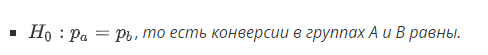

### При **правосторонней альтернативной гипотезе** (ранее из кумулятивных графиков мы видели, что кумулятивная конверсия в группе А выше, чем в группе B, поэтому мы хотим удостовериться в этом с помощью статистического теста, и нам подойдёт правосторонняя гипотеза):

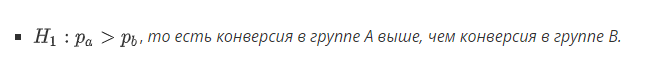

Зададим уровень значимости **alpha = 0.05** и будем сравнивать полученное *p-value* с ним. По умолчанию функция proportions_ztest() возвращает z-статистику и p-value для двусторонней альтернативной гипотезы (конверсии в группах не равны). 

### ✏️ Z-статистика нас пока что не интересует, а вот p-value занесём в отдельную переменную для дальнейшего сравнения с уровнем значимости.

In [ ]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


### Итак, мы получили p-value = 0.1. Оно больше, чем заданный уровень значимости 0.05, а значит мы должны принять нулевую гипотезу о равенстве конверсий. 

### **Что это значит для нас и для бизнеса?** Так как z-тест для пропорций показал, что истинные значения конверсий в группах равны (с уровнем значимости 0.05), то полученная разница в метрике в группах статистически не значима. Переводим на язык бизнеса: разницы между вариантами рекомендаций сопутствующих товаров нет — они одинаково эффективны по метрике конверсии! 

### На основе этого вывода мы принимаем решение о том, что делать дальше. Возможные варианты:

+ отказаться от внедрения ML-модели для рекомендаций сопутствующих товаров и оставить использование текущей версии рекомендаций;
+ попытаться усовершенствовать модель и провести тестирование снова;
+ использовать оба варианта системы рекомендаций и посмотреть на результат в более долгосрочной перспективе.

**Примечание.** Важно отметить, что тест для пропорций можно применять не только к конверсии. Например, так же можно оценивать долю больных людей, долю просроченных кредитов и так далее.

### ✏️ Заметим, что, если повысить уровень значимости до alpha = 0.1, то есть «ослабить» требование по точности, можно получить уровень конверсии в группе А, всё-таки превышающий конверсию в группе B. Выполните предыдущий код, чтобы убедиться в этом. Предварительно задайте значение переменной alpha = 0.1. 

Результат должен быть следующим:

+ p-value:  0.1
+ Отвергаем нулевую гипотезу. Конверсии в группах А и B равны
+ Альтернативная гипотеза. H1: Конверсия в группе А выше, чем конверсия в группе B

### Таким образом, при уровне значимости alpha = 0.1 гипотеза о равенстве конверсий всё же отвергается. В таком случае считается, что первая версия рекомендаций лучше, чем вторая версия. 

### **Какой уровень значимости выбрать?**

### Стараются придерживаться уровней значимости 0.05 или 0.1. Помним, что больший уровень значимости подразумевает больший риск совершить ошибку I рода (отклонить верную нулевую гипотезу). Вы сами определяете уровень значимости в зависимости от вашей гипотезы и того, сколько будет стоить вам ошибка I рода.Как правило, если возникают спорные ситуации, то склоняются в пользу уже существующего варианта А, так как он не требует временных и денежных затрат на внедрение. В нашем примере варианты А и B оказались равными по признаку конверсии при уровне значимости 0.05, однако при уровне значимости 0.1 вариант А оказывается более эффективным.
### Так или иначе, немедленное внедрение варианта B — определённо не лучшая идея. Либо его необходимо доработать и провести тестирование заново, либо стоит отказаться от него вовсе.

# СТАТИСТИЧЕСКИЕ ТЕСТЫ ДЛЯ ДРУГИХ МЕТРИК

### На самом деле наша с вами задача об оценке эффективности двух вариантов была очень упрощена. Мы с вами рассматривали только одну метрику — конверсию добавления в корзину. Но на деле обычно смотрят на несколько показателей в комплексе!

### Помимо конверсии, нужно рассматривать и другие метрики, например средний чек. Возможно же такое, что конверсия в группах одинаковая, а вот средние чеки существенно различаются! 

### В таком случае проводятся статистические тесты для обеих метрик, и решение принимается в пользу варианта, который эффективнее по более приоритетной метрике (например, если мы хотим повысить прибыль, это будет средний чек).

### **Что делать с другими метриками?**
### А всё то же самое! Мы выполняем аналогичные действия: проводим визуальный анализ показателей, смотрим на кумулятивные графики, проводим статистический тест (строим доверительный интервал, речь о котором пойдёт далее) и определяем статистическую значимость разницы в показателях.

При этом важно помнить о том, что любой статистический метод имеет свою область применения, которая зависит от задачи и распределения данных. Перед тем как проводить статистический тест, важно узнать распределение метрики, по которой вы будете сравнивать. Вспомните диаграмму-алгоритм по выбору статистического теста из прошлого модуля. 

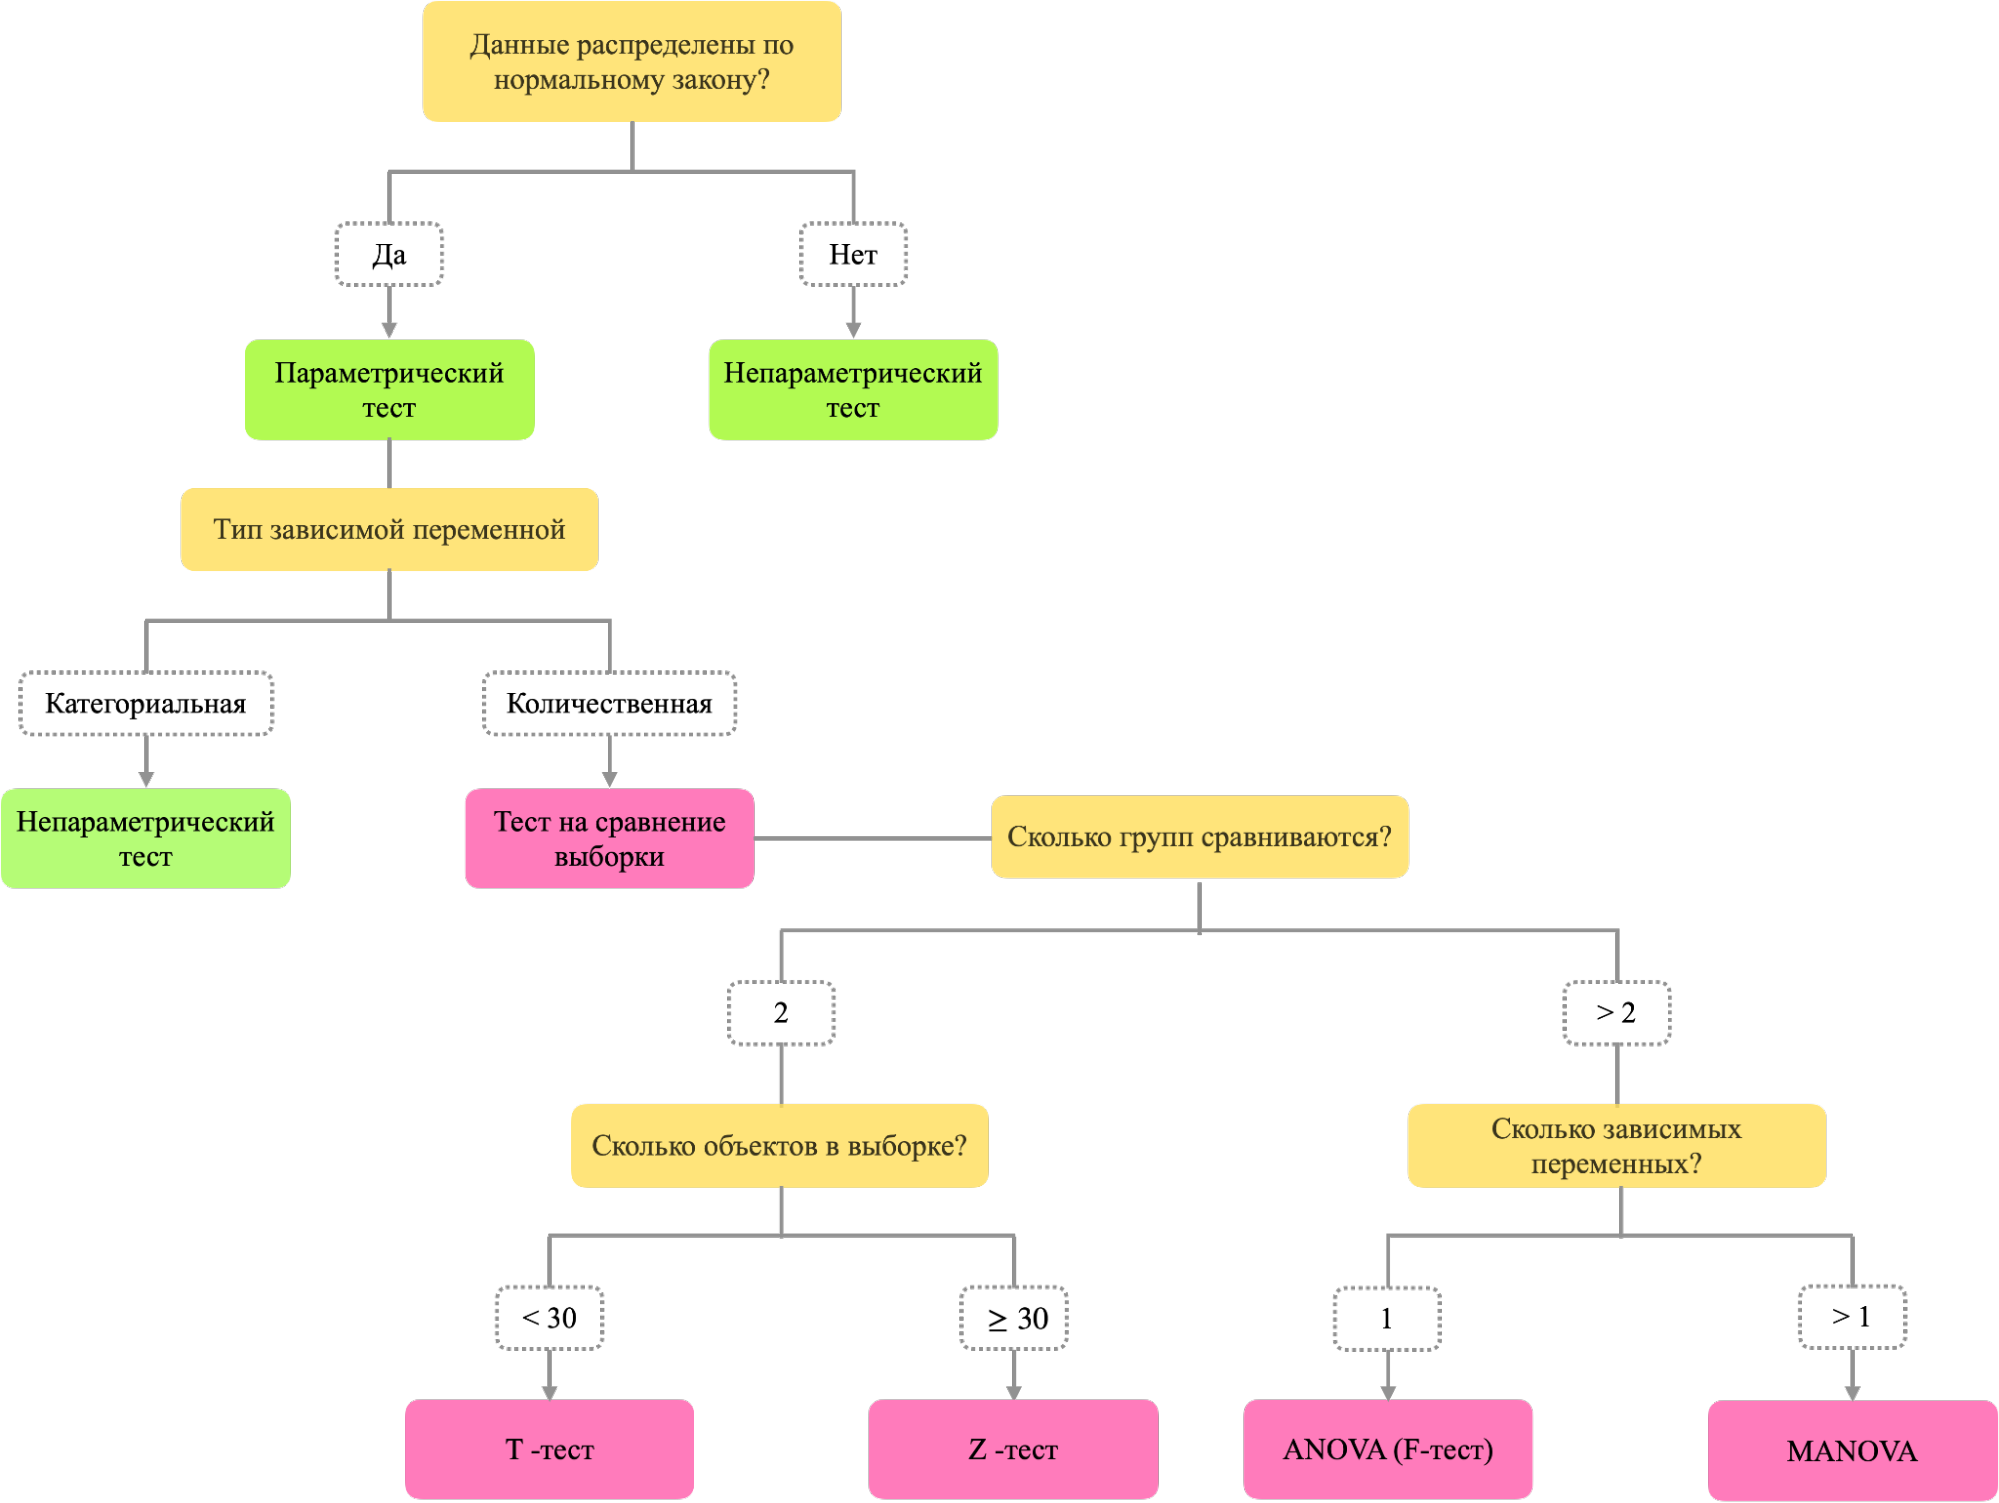

### Например, время, проведённое на сайте, часто распределено нормально, и тогда мы можем использовать **T-тест для средних** (напомним, данный тест требует, чтобы данные были распределены нормально).

### А вот денежные метрики, такие как средний чек, часто (но не всегда) напоминают логнормальное распределение (большинство распределений сосредоточены близ нуля, и частота постепенно падает):

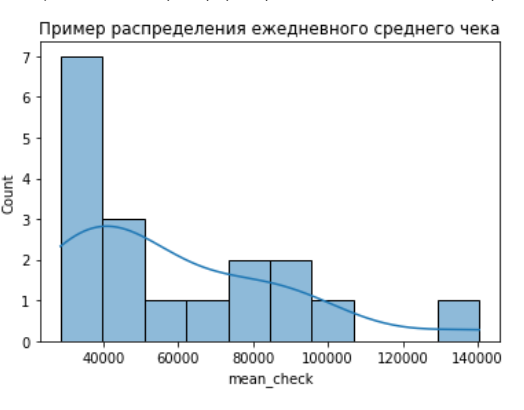

На графике изображён пример сглаженного по гистограмме распределения среднего чека. Видно, что с увеличением ежедневного среднего чека падает его частота.

### Для них T-тест уже не подойдёт. Здесь, как правило, используются непараметрические тесты, например **критерий Манна-Уитни** и другие. Данные тесты применяются в случаях, когда распределение показателя отлично от нормального.

### Для проверки распределения на нормальность мы всегда можем воспользоваться **тестом Шапиро-Уилка** или **тестом Д’Агостино**.

Давайте рассмотрим следующий пример.

### Мы проводим A/B-тест, чтобы оценить, влияет ли тема оформления на привлекательность сайта для пользователя. Гипотеза заключается в том, что тёмная тема более привлекательная для наших посетителей, поэтому их сильнее заинтересует наш сайт, следовательно, они проведут на нём больше времени. Уровень значимости равен 5 %.

In [ ]:
time_data = pd.read_excel('time_data.xlsx')
display(time_data.head())
 

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


✏️ Построим гистограмму времени, проведённом пользователями на сайте в каждой из групп:

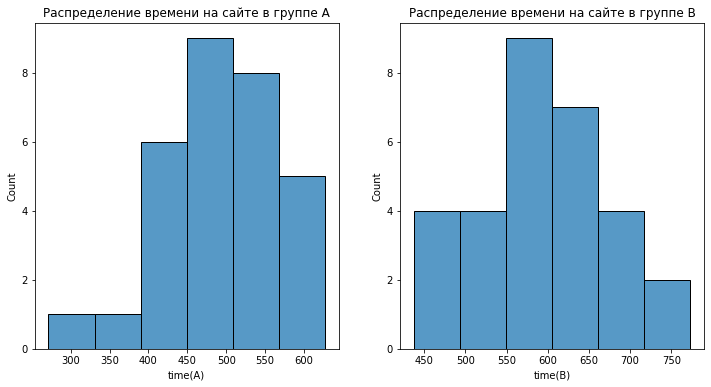

In [ ]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

Гистограммы напоминают нормальное распределение. Давайте проверим гипотезу о нормальности обоих распределений с помощью критерия Шапиро-Уилка. Для этого используем функцию shapiro() из модуля scipy.stats:

In [ ]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


Итак, распределение в обеих группах нормальное, а значит, мы можем воспользоваться T-тестом для того, чтобы сравнить среднее время посещения сайта в группах.

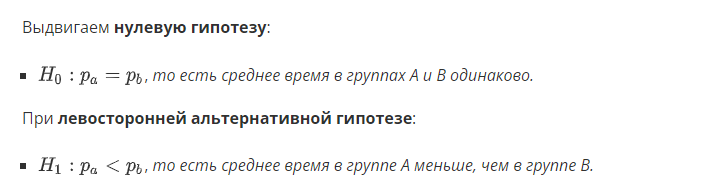

✏️ Применим **T-тест для сравнения средних** — функцию ttest_ind() из модуля scipy.stats. Обратите внимание, что левосторонняя альтернативная гипотеза в модуле scipy указывается в параметре alternative как 'less' (правосторонняя — 'greater’):

In [ ]:
from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'], 
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время в группах одинаково
Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B


## Обратите внимание: мы запрашивали значение p-value, округлённое до двух знаков после запятой, но на выводе получили 0.0 — значение только с одним знаком после запятой. Где же второй? Дело в том, что Python не выводит на конце числа больше одного нуля. Значит, 0.0 следует читать как 0.00. Без округления мы бы увидели значащие цифры далеко после запятой. Однако нас интересуют только две после запятой, потому что с такой точностью задан уровень значимости. Итак, в результате проведения T-теста мы получили p-value = 0 < 0.05, а это значит, что мы отвергаем нулевую гипотезу в пользу альтернативной: среднее время, проводимое на сайте, в группе А меньше, чем в группе B.

### Отсюда можно сделать вывод, что что тёмная тема более привлекательна для наших посетителей, чем светлая. 

⭐️ Обратите внимание, что мы опять же принимаем решение, исходя только из одной метрики, так как другими мы и не обладали. Мы проведём комплексный анализ результатов A/B-тестирования по нескольким метрикам в финальном задании модуля. А пока предлагаем вам решить несколько задач!

## Задание 5.1

Проводится A/B-тестирование нового варианта расстановки товаров в магазине. Предполагается, что число покупок определённого товара вырастет, если расположить его рядом с кассой. Какой статистический тест вы будете использовать для сравнения вариантов расстановки по конверсии покупки этого товара?

+ Z-тест для пропорций

Конверсия является долевым показателем. Для проверки гипотезы о равенстве долей (пропорций) используется Z-тест для пропорций.





## Задание 5.2

Проверьте гипотезу о равенстве конверсий в группах А и B при альтернативной гипотезе: Конверсия в группе А меньше, чем конверсия в группе B. Используйте функцию proportions_ztest() из модуля statsmodels.stats.proportion. В качестве уровня значимости возьмите 0.1.

In [ ]:
transactions_piv= df.groupby('group').agg({'cid':'count', 'transactions':'sum'}
                                                      ).rename(columns={'cid':'count', 'transactions':'sum'})
count=transactions_piv['sum'], #число "успехов"
nobs=transactions_piv['count'], #общее число наблюдений

In [ ]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.1 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=transactions_piv['sum'], #число "успехов"
    nobs=transactions_piv['count'], #общее число наблюдений
    alternative='smaller',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value:  0.22
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


## Задание 5.3

Проверьте гипотезу о нормальности распределений ежедневного среднего чека с помощью критерия Шапиро-Уилка. В качестве уровня значимости возьмите 0.1.

Каковы результаты тестирования?

In [ ]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.1 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(sample_a['revenue'])
shapiro_result_b = shapiro(sample_b['revenue'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.0
p-value группы B 0.0
Отвергаем нулевую гипотезу. Распределения в обеих группах нормальные
Альтернативная гипотеза. H1: Распределение в одной или обеих группах отлично от нормального


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Задание 5.4

Проверьте гипотезу о равенстве ежедневных средних чеков с помощью критерия Манна-Уитни при альтернативной гипотезе: Ежедневный средний чек в группе А меньше, чем в группе B. Используйте функцию mannwhitneyu() из модуля scipy.stats. В качестве уровня значимости возьмите 0.1.

Каковы результаты тестирования?

In [ ]:
from scipy.stats import ttest_ind
H0 = 'Средний чек в группах одинаково'
H1 = 'Средний чек в группе А меньше, чем в группе B'
alpha = 0.1 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=sample_a['revenue'],
    b=sample_b['revenue'],
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))


p-value: 0.09
Отвергаем нулевую гипотезу. Средний чек в группах одинаково
Альтернативная гипотеза. H1: Средний чек в группе А меньше, чем в группе B


# 6. Анализ результатов A/B-тестирования: доверительные интервалы

### → Ещё один важный статистический метод, который нам необходимо изучить — это доверительные интервалы. Давайте ненадолго отвлечёмся от нашей задачи про конверсию на сайте и рассмотрим небольшой, но очень важный для понимания кусочек статистической теории.

### Итак, мы с вами знаем, что на основе выборки (части наблюдений) мы всегда можем измерить следующие показатели:

+ **выборочное среднее** (центральная мера распределения);
+ **выборочное стандартное отклонение** (мера разброса);
+ **выборочную пропорцию** (доля объектов из выборки, выбранных по условию, например доля пользователей, совершивших покупки).

### Однако эти оценки не являются нашим основным предметом интереса. На самом деле нас интересуют параметры генеральной совокупности: 

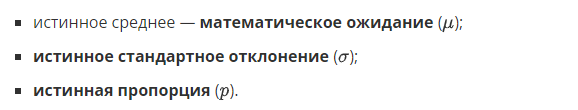

### Если вы взяли выборку клиентов и выяснили их предпочтения, вам важно не то, что вы узнали предпочтения именно этих клиентов — вам важно, что теперь вы знаете предпочтения всех ваших клиентов (**генеральная совокупность**).

Важно помнить о разнице между выборочными статистиками и параметрами генеральной совокупности.

## **Выборочная статистика** является случайной величиной, ведь она рассчитана на случайной выборке. Если мы возьмём одну выборку и посчитаем значение среднего, мы получим одно значение; возьмём другую — получим другое значение.

## А вот параметр **генеральной совокупности** — это константа, конкретное число, которое, как правило, нам неизвестно и никогда известным не станет. Однако его можно приблизительно оценить!

### Существует два способа оценки параметров генеральной совокупности:

+ ⭐ Точечные оценки.
+ ⭐ Интервальные оценки.

### С **точечными оценками** на самом деле мы уже знакомы и не раз их вычисляли — это просто выборочные статистики. Например, мы собрали данные о росте прохожих людей и посчитали среднее, стандартное отклонение и так далее. Почему они точечные? Потому что они дают ответ точечно, то есть в виде одного числа.

### С одной стороны, это удобно: взяли выборку, посчитали выборочное среднее и получили ответ, к примеру «средний рост в этой выборке равен 178 см».

Однако есть у такого подхода и существенный недостаток: полученное значение практически никогда не равно истинному. 

## **Интервальные оценки** — это ещё один способ оценки параметров генеральной совокупности, при использовании которого ответ даётся не в виде одного числа, а в виде интервала. 

Тогда мы скажем так: «Истинный средний рост лежит в интервале от 170 до 179 см с такой-то долей уверенности». Скорее всего, истинный параметр будет находиться внутри этого интервала.

## **Доверительный интервал** — интервал, который с заданной надёжностью покрывает значение неизвестного параметра.

Например, если вам говорят, что построен 90 %-ый доверительный интервал для среднего роста и имеет вид: (170, 179), то это означает, что с **надёжностью** в 90 % истинный средний рост (его математическое ожидание) лежит в пределах от 170 см до 179 см. То есть с вероятностью в 90 % ожидается (в среднем), что любой человек из рассматриваемой генеральной совокупности имеет рост от 170 до 179 см.

### Доверительные интервалы бывают **двусторонними**, **левосторонними** и **правосторонними** (как гипотезы). Мы с вами будем рассматривать только построение двусторонних доверительных интервалов, так как они являются наиболее популярными.

Любой двусторонний доверительный интервал обладает следующей структурой:

## Параметр = Выборочная оценка ± Предел погрешности

### Выборочной оценкой может быть среднее, стандартное отклонение, пропорция, медиана и так далее. А о том, как считается предел погрешности, и от чего он зависит, мы поговорим позже.

### В соответствии с этой формулой можно нарисовать доверительный интервал. Обозначим выборочную оценку как x, а предел погрешности как E. 

Тогда истинное значение параметра (с заданной степенью надёжности) лежит где-то внутри интервала:

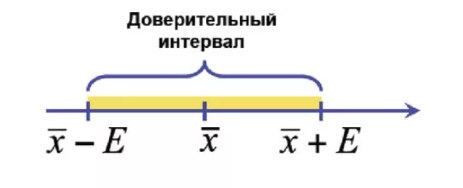

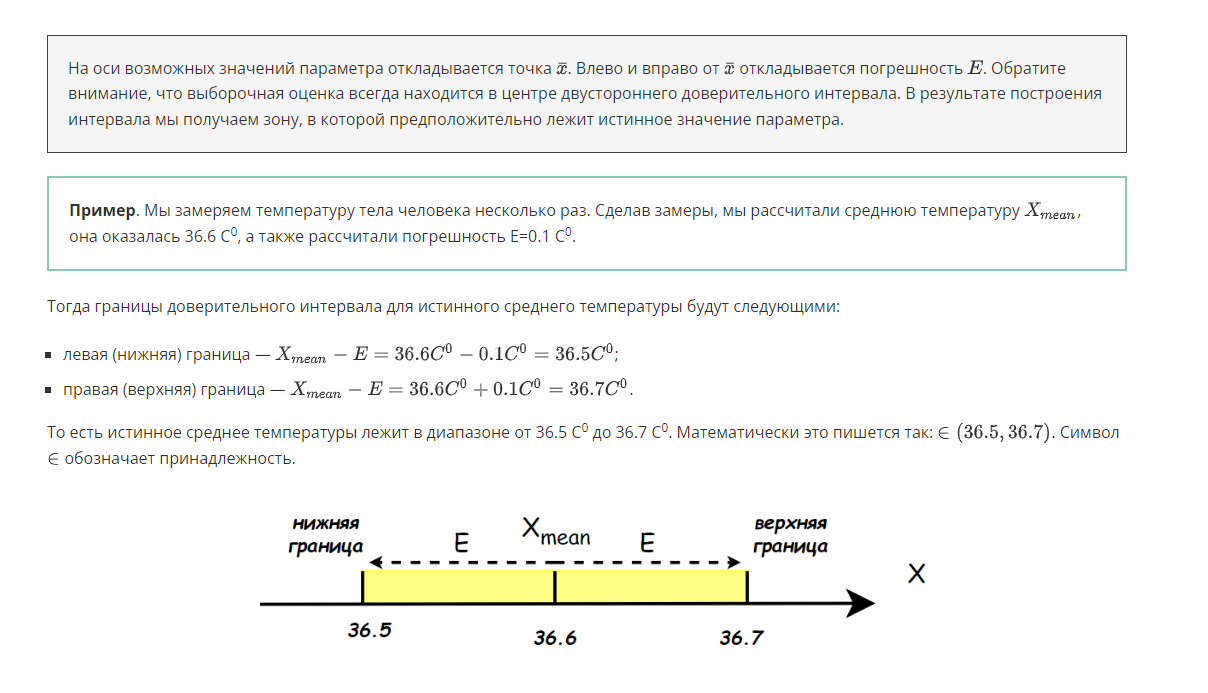

# ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ СРЕДНЕГО ПРИ ИЗВЕСТНОМ ИСТИННОМ СТАНДАРТНОМ ОТКЛОНЕНИИ

### Самым частым параметром, который хотелось бы оценить, является истинное среднее (математическое ожидание). И начнём мы сразу с задачи:

Была опрошена случайная выборка из 36 жителей региона об их затратах на продукты питания за последний месяц. Выборочное среднее оказалось равным 16 100 рублей.
Допустим, откуда-то известно, что истинное стандартное отклонение расходов равно 12 000 рублей.
Нам нужно построить доверительный интервал для истинных средних расходов жителя данного региона на продукты питания в месяц. Интервал должен определять истинное значение с надежностью в 95 %.

### Страшно и непонятно? Давайте разбираться. 

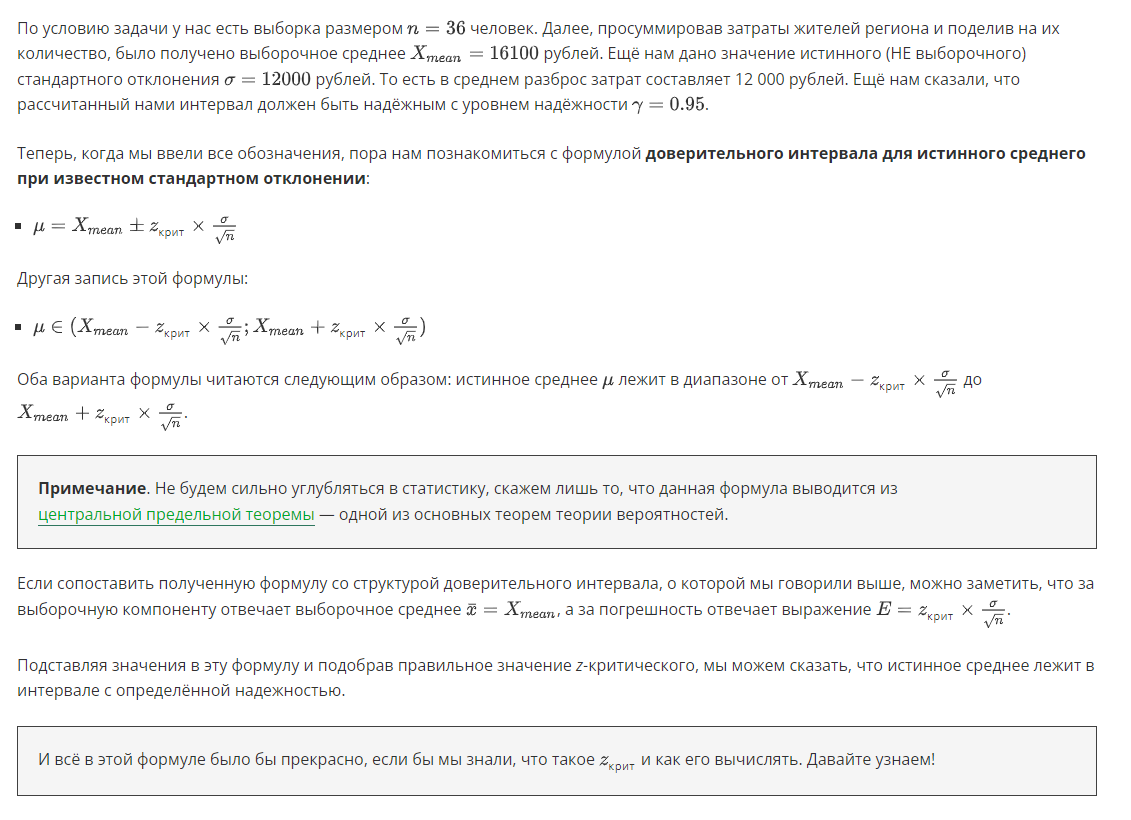

# ОТКУДА БЕРЁТСЯ Z-КРИТИЧЕСКОЕ?

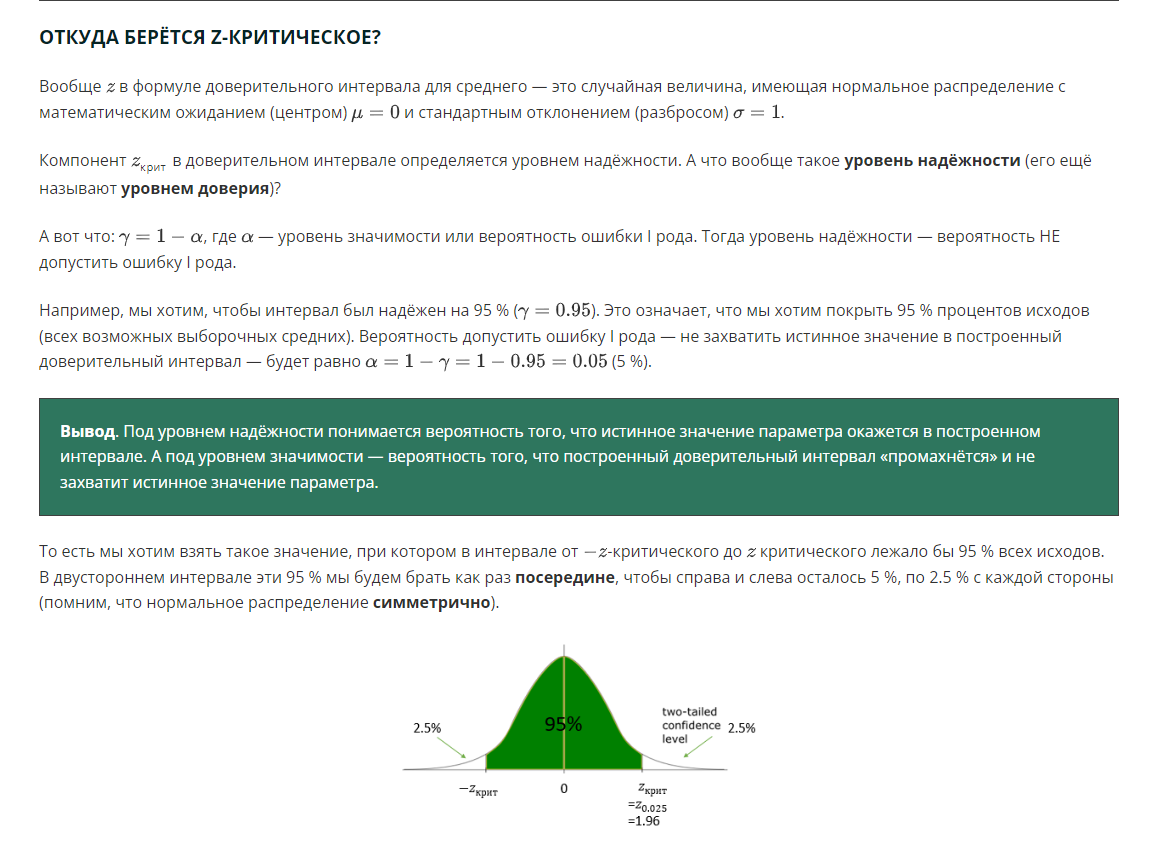

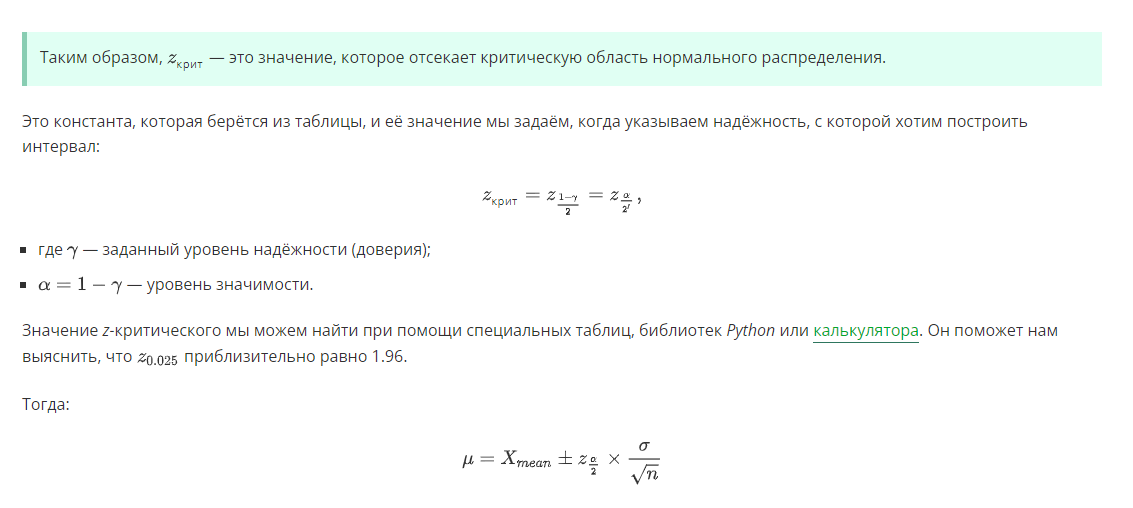

### ✏️ Теперь ничто не мешает решить нашу задачу! Вычисления будем производить с помощью Python. 

Задаём необходимые для вычисления переменные:

In [ ]:
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

### Найти значение z-критического для любого уровня значимости можно при помощи функции norm.ppf() из модуля scipy.stats. По специфическим причинам реализации функция возвращает не совсем z-критическое, а его отрицательный модуль, поэтому мы берём его со знаком минус.

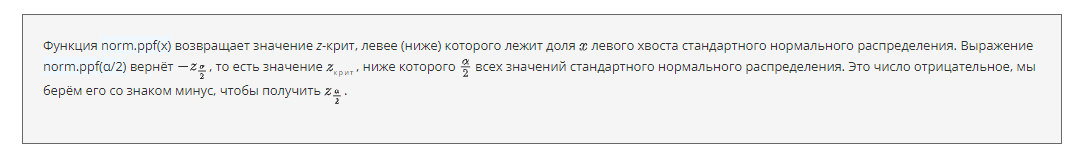

In [ ]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z критическое

### Итак, у нас есть все ингредиенты, чтобы «приготовить» доверительный интервал. Вычислим нижнюю и верхнюю границу по формуле. Округлим результат до целого и выведем на экран:

In [ ]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (12180, 20020)


+ **Примечание. Заметьте, что это универсальный код. Если перед вами возникнет другая задача расчёта доверительного интервала для истинного среднего, то вам достаточно будет правильно поменять значения переменных. Вы можете оформить его в виде функции и сохранить её, чтобы не строить каждый раз новый доверительный интервал**

### Полученный результат интерпретируется следующим образом: мы на 95 % уверены, что истинные расходы жителей на продукты питания лежат в интервале от 12 180 рублей до 20 020 рублей. 

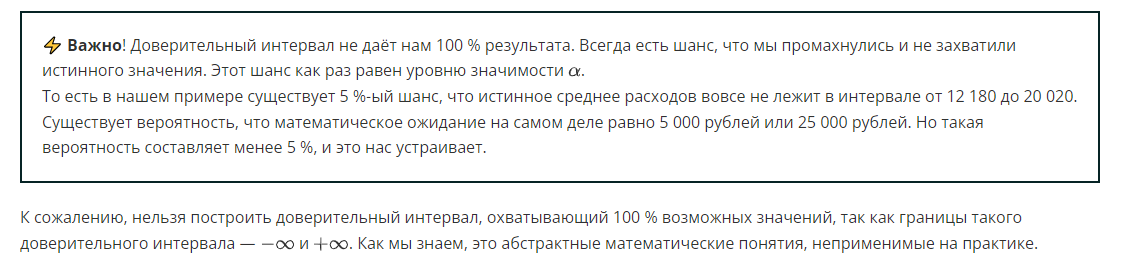

## Задание 6.5

In [ ]:
n = 64 # размер выборки
x_mean = 12.35 # выборочное среднее
sigma = 2.4 # истинное стандартное отклонение
gamma = 0.90 # уровень надежности
alpha = 1 - gamma # уровень значимости

z_crit = -norm.ppf(alpha/2) # z-критическое
print('z критическое: {}'.format(round(z_crit, 2)))

eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound, 2), round(upper_bound, 2)) # создаем кортеж из округленных границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

z критическое: 1.64
Доверительный интервал: (11.86, 12.84)


# ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ СРЕДНЕГО ПРИ НЕИЗВЕСТНОМ СТАНДАРТНОМ ОТКЛОНЕНИИ

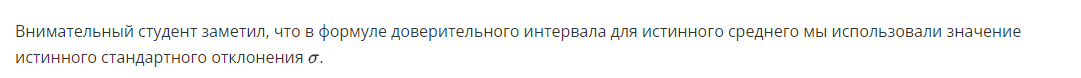

## Для правомерного использования формулы истинное стандартное отклонение выборки должно быть известно. Но, как правило, нам неизвестно это значение (если только оно не свалилось на нас озарением), ведь для этого нам нужно знать все значения генеральной совокупности. А если они у нас есть, то нам и доверительные интервалы не нужны — зная всю генеральную совокупность, всегда можно найти истинные параметры.

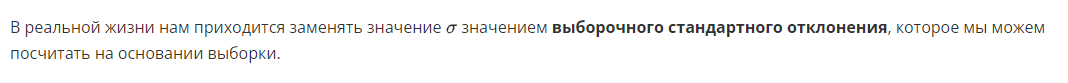

### Когда мы заменяем константу на случайную величину, точность всей конструкции явно становится меньше. Вероятно, итоговая величина будет похожа на нормальное распределение, но будет обладать бОльшим разбросом.

### Такая случайная величина хорошо описывается *распределением Стьюдента*, или **Т-распределением**. 

## **Распределение Стьюдента** — это целое семейство родственников стандартного нормального распределения.

### Действительно, центр (среднее) по-прежнему будет в 0, а вот разброс значений (то есть стандартное отклонение) будет уже больше. Этот разброс будет различным в зависимости от степеней свободы (k).

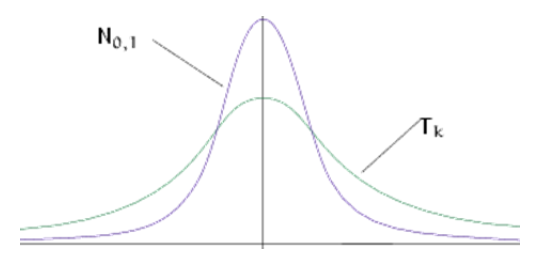

### На рисунке *фиолетовым* цветом изображено нормальное распределение с параметрами 0 и 1, а *зелёным* цветом — распределение Стьюдента. Отчётливо видно, что распределение Стьюдента несколько «шире» — обладает бОльшим разбросом.

### Степени свободы  обозначаются d.f. (от англ. degrees of freedom). Они и говорят нам о том, насколько велик разброс в значениях распределения Стьюдента. Этот параметр вычисляется как k = n-1, где n — размер выборки.

### Чем больше k, тем меньше разброс распределения и тем ближе оно к нормальному, что можно продемонстрировать следующим рисунком:

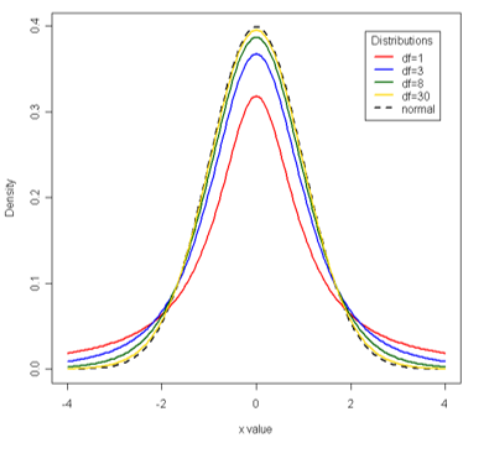

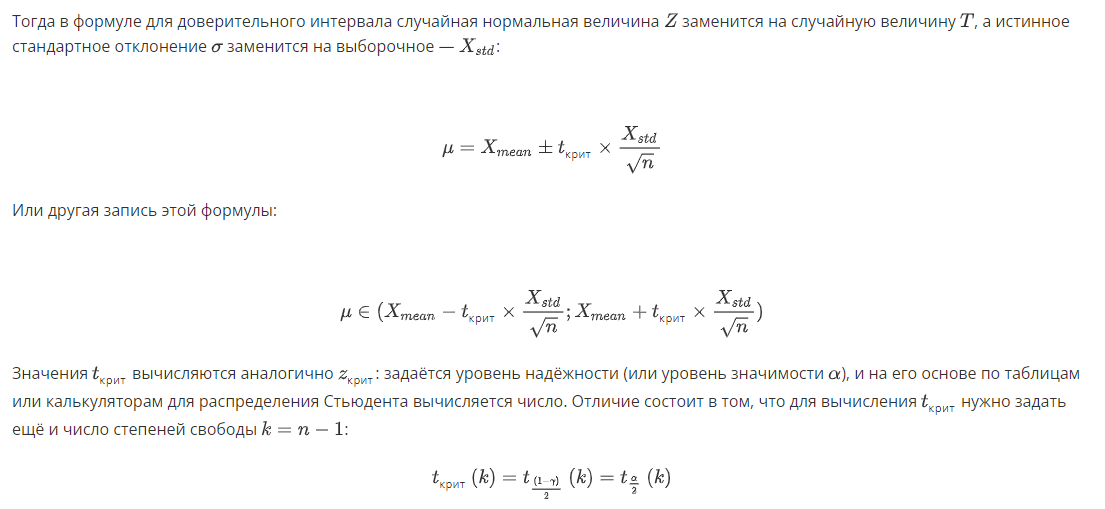

### ✏️ А теперь давайте решим задачу!

### Управляющий супермаркета хочет оценить, сколько денег покупатели тратят за один поход в супермаркет в среднем. На основании ранее собранных данных известно, что расходы одного покупателя распределены приблизительно нормально. Управляющий взял случайную выборку из 15 покупателей и выяснил, что их средние расходы равны 2 000 рублей, а выборочное стандартное отклонение равно 400 рублей.

Для оценки управляющий хочет построить доверительный интервал с надёжностью в 95 %.

Давайте поможем управляющему, решив несколько задачек с помощью Python.

Итак, зададим необходимые для решения задачи переменные:

In [ ]:
n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

### Найти значение t-критического для любого уровня значимости можно, используя функцию t.ppf() из модуля scipy.stats. Для этого в функцию передаётся интересующий уровень значимости (alpha/2) и число степеней свободы (k=n-1). Аналогично z-критическому функция возвращает отрицательный модуль t-критического, поэтому мы берём его со знаком минус:

In [ ]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

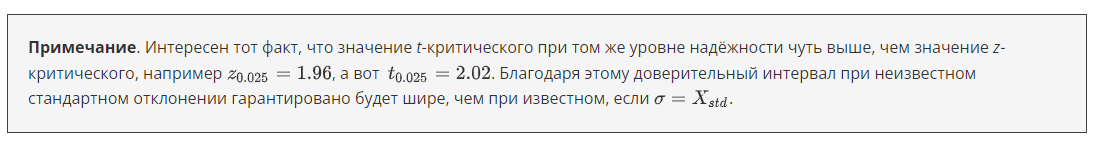

### Теперь составим доверительный интервал для истинного среднего. Вычислим левую и нижнюю границу по формуле. Округлим результат и выведем на экран:

In [ ]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (1778, 2222)


### Итак, мы на 95 % уверены, что истинные траты покупателей в нашем магазине лежат в интервале от 1 778 до 2 222 рублей. 

### **Примечание**. Важно отметить, что при достаточной выборке (примерно более 30 наблюдений) распределение Стьюдента очень похоже на стандартное нормальное распределение. В этом случае можно использовать первую формулу (z-критическое) даже при неизвестном стандартном отклонении. Однако используя вторую формулу при оценке среднего, вы не ошибётесь.

### Ещё один важный факт состоит в том, что обе формулы работают только при соблюдении двух условий:

+ Выборка должна быть случайной.
+ Выборка должна быть достаточно велика. Но есть исключение: если выборка маленькая, но сама величина распределена нормально, то выборочное среднее тоже будет распределено нормально. В таком случае мы можем пользоваться формулой доверительного интервала.

## Задание 6.6

Чиновника интересует сумма подоходного налога, выплачиваемого домохозяйствами за год. На случайной выборке из 25 домохозяйств был посчитан средний размер выплаченного налога, и он составил 3 540 долл. Также известно выборочное отклонение величины подоходного налога, равное 1 150 долл.

Необходимо найти 90 %-ый доверительный интервал для истинного среднего значения налоговых выплат за год. Используйте формулу с t-критическим.

Укажите границы построенного доверительного интервала для истинного среднего. Ответ округлите до целого.

In [ ]:
n = 25 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 3540 # выборочное средней
x_std = 1150 # выборочное стандартное отклонение
gamma = 0.90 # уровень надежности
alpha = 1 - gamma # уровень значимости

t_crit = -t.ppf(alpha/2, k) # t критическое
print('t критическое: {}'.format(round(t_crit, 2)))

eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound, 2), round(upper_bound, 2)) # создаем кортеж из округленных границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

t критическое: 1.71
Доверительный интервал: (3146.5, 3933.5)


# ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ ПРОПОРЦИИ

### Настало время вернуться к нашей задаче об анализе конверсии в двух группах A/B-тестирования.

### Давайте ещё раз вспомним, что такое конверсия. 

## **Конверсия** — это доля пользователей, совершивших целевое действие, по отношению к общей массе пользователей. 

### Ранее мы уже выяснили, что признак того, осуществлена конверсия пользователем или нет — это случайная величина, имеющая распределение Бернулли. Такая случайная величина имеет два возможных исхода: 

+ успех (1) — конверсия осуществлена (пользователь совершил целевое действие);
+ неуспех (0) — пользователь не совершил целевое действие. 

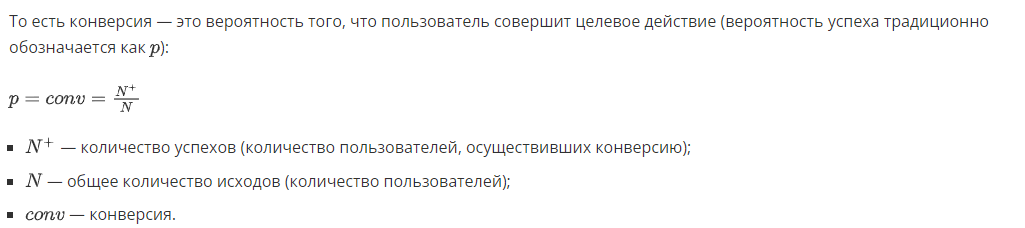

### **Примечание**. При расчётах конверсии обычно долю ещё умножают на 100 %.

### В контексте задачи A/B-тестирования нам бы хотелось знать истинную конверсию (а не ту, которая подсчитана по выборке) в контрольной и тестовой группе, а также оценить истинную разницу между конверсиями. 

### Если подумать, то на самом деле мы решаем задачу оценки истинной пропорции генеральной совокупности по выборке. А значит,  нужно научиться строить **доверительный интервал для пропорции**.

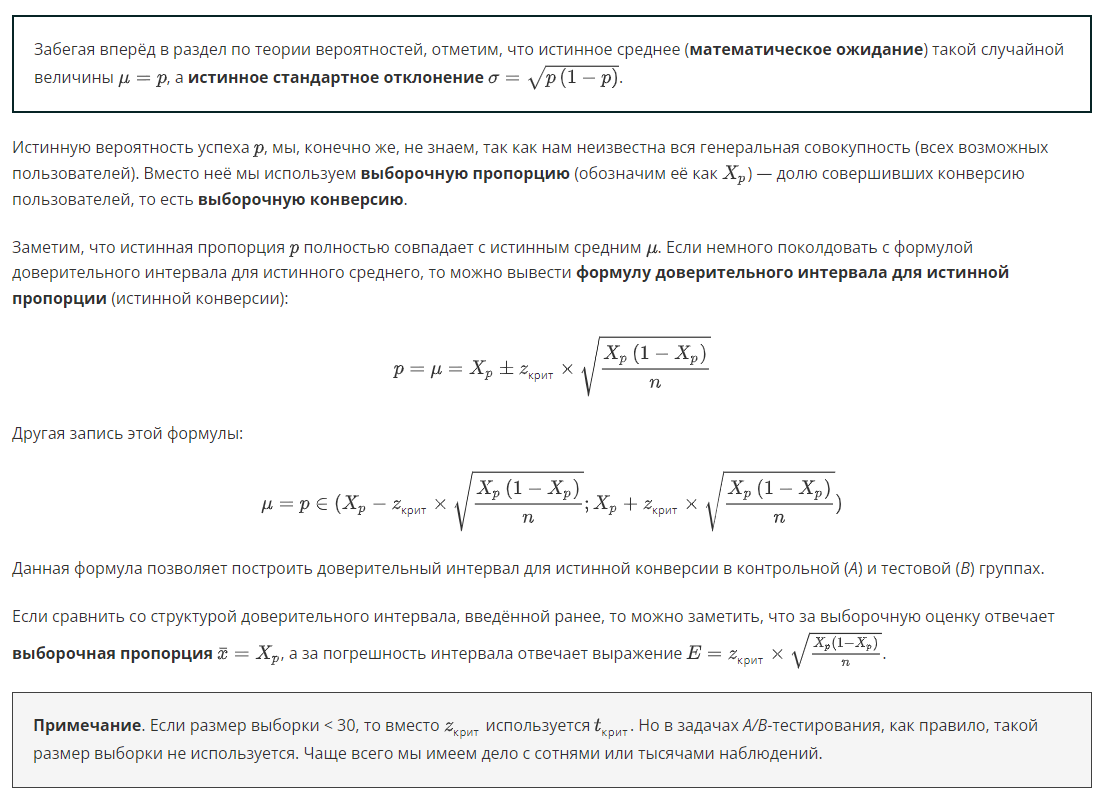

### ✏️ Пора приступать к реализации на Python. Будем работать с данными о посетителях веб-сайта из прошлого юнита:

In [ ]:
ab_data = pd.read_csv('ab_data.csv')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


### Для удобства создадим отдельные таблицы для каждой из групп пользователей:

In [ ]:
#фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
#фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

### Давайте на этот раз оформим расчёт в виде функции: объявим функцию proportions_conf_interval(). У данной функции будет три аргумента: n — размер выборки, x_p — выборочная пропорция и gamma — уровень надёжности (по умолчанию он равен 0.95). Функция будет возвращать кортеж из вычисленных границ доверительного интервала, умноженных на 100 % и округлённых до второго знака после запятой.

In [ ]:
def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

### Теперь применим нашу функцию к данным группы А и группы B:

In [ ]:
conf_interval_a = proportions_conf_interval(
n=a_data['user_id'].count(), # размер выборки
x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
n=b_data['user_id'].count(), # размер выборки
x_p=b_data['converted'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))

Доверительный интервал для конверсии группы А: (11.86, 12.19)
Доверительный интервал для конверсии группы B: (11.7, 12.03)


### Итак, можно сделать вывод, что с надёжностью в 95 % конверсия группы А лежит в интервале от 11.86 % до 12.19 %, а конверсия группы B лежит в интервале от 11.7 % до 12.03 %.

Если схематично изобразить построенные доверительные интервалы для конверсии в группах А и B, можно отчётливо заметить пересечение интервалов (обозначено синим цветом):

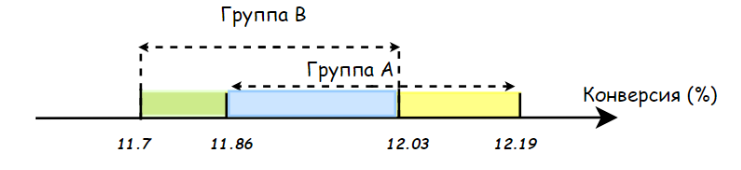

### **Что значит такое пересечение интервалов для нас?** Это значит, что существует вероятность, что истинное значение конверсии в обеих группах может совпасть (попасть в синюю зону). То есть мы не можем однозначно сказать, есть ли разница в конверсиях. Можно даже рассчитать эту вероятность, но лучше пойти другим путём.

### Лучше построить доверительный интервал разницы пропорций (конверсий).

### Не будем уходить в статистические дебри, просто приведём формулу для расчёта доверительного интервала разницы конверсий в группах. Запоминать её, как и считать руками, не нужно, мы реализуем расчёты с помощью Python. Однако важно понимать её составляющие:

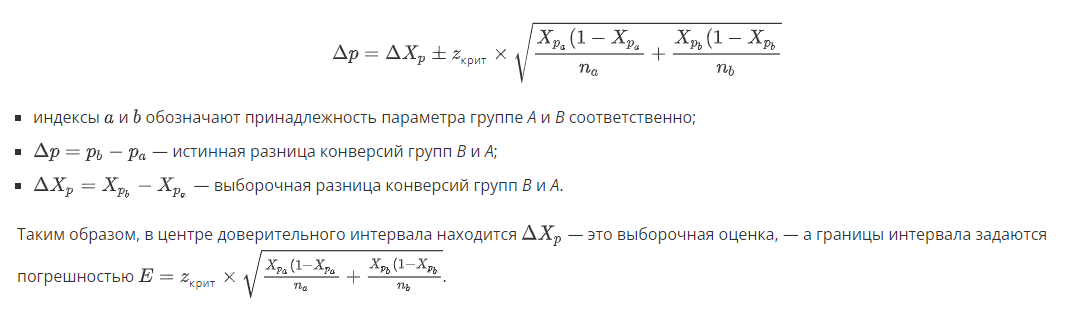

### Допустим, мы построим такой доверительный интервал. Как тогда на его основе сделать выводы и принять решение? Возможны три случая:


## Обе границы доверительного интервала являются положительными (больше 0)

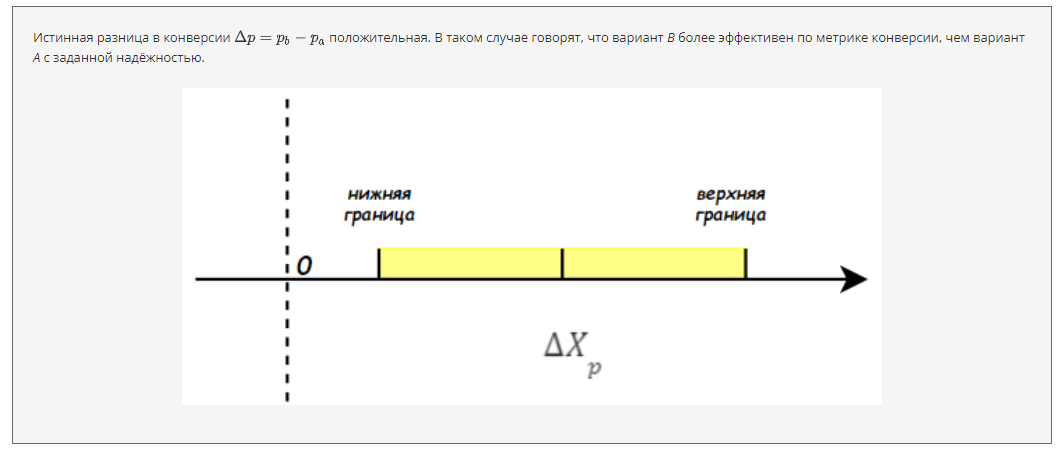

## Обе границы доверительного интервала являются отрицательными (меньше 0)

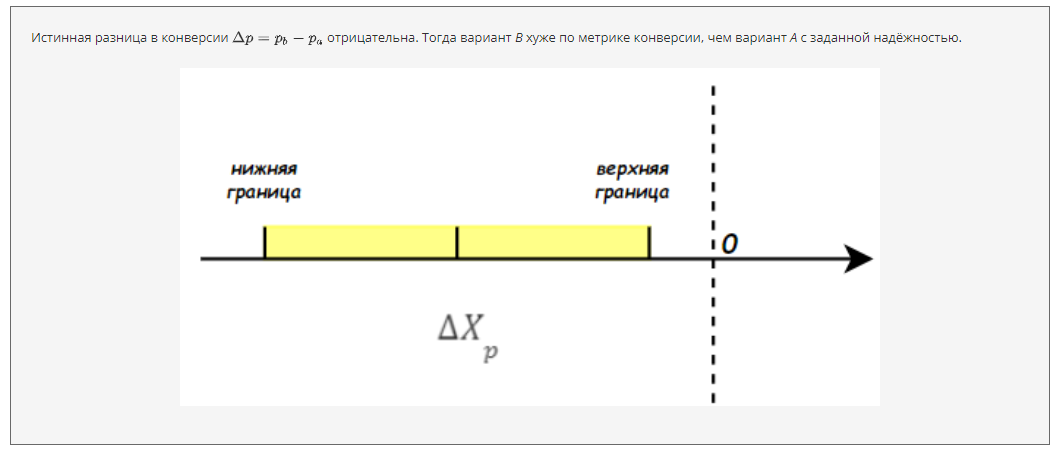

## Интервал охватывает точку 0

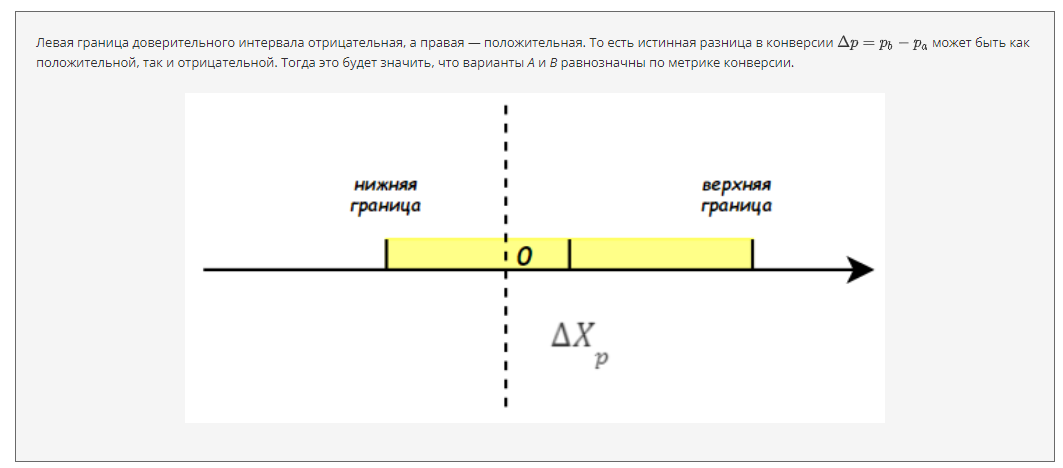

### ✏️ Создадим функцию diff_proportions_conf_interval() со следующими аргументами: n — список из размеров выборки для групп А и B соответственно, xp — список из выборочных пропорций для групп А и B соответственно и gamma — уровень надёжности (по умолчанию он равен 0.95). Функция будет возвращать кортеж из вычисленных границ доверительного интервала разницы конверсий, умноженных на 100 % и округлённых до второго знака после запятой.

In [ ]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

### Вызовем функцию и построим интересующий нас доверительный интервал:

In [ ]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

Доверительный интервал для разности конверсий: (-0.39, 0.08)


### Итак, что можно сказать теперь? Построенный доверительный интервал с 95 %-ой надёжностью говорит нам, что разница в конверсии между вариантом B и вариантом А лежит в интервале от -0.39 % до 0.08 %. 

### То есть разница в конверсии с 95 %-ой надёжностью может быть как положительной, так и отрицательной. Мы имеем дело с третьим случаем — интервал охватывает точку 0.

## Отсюда можно сделать вывод, что статистической разницы в конверсии между вариантами А и B не существует, то есть они являются равнозначными по данной метрике.

### В заключение хотелось бы отметить, что доверительный интервал для пропорции применяется не только для оценки конверсии и разницы конверсий в группах!

### Под истинной пропорцией может пониматься доля успешно угаданных моделью объектов (accuracy), доля выздоровевших пациентов или доля ушедших клиентов (отток). То есть такой доверительный интервал может быть применён в любой задаче A/B-тестирования, где признак, по которому считается метрика, бинарный (имеет два возможных исхода — «успех» и «неуспех»). А это очень большой спектр задач!

### Таким образом, доверительные интервалы — это ещё один вспомогательный инструмент проведения A/B-тестирования, который позволяет с определённой заранее надёжностью статистически сравнить варианты продукта А и B по заданной метрике. 

### ⭐️ Обычно доверительные интервалы используются в комплексе со статистическими тестами. Статистический тест показывает, значимы ли наши результаты, а доверительный интервал показывает пределы изменения метрик и их разницы в группах. 

## Задание 6.9

Чтобы оценить удовлетворённость клиентов сети отелей, менеджер взял случайную выборку из 189 комментариев, оставленных посетителями на онлайн-платформе по бронированию, и провёл анализ их содержания. Выяснилось, что 132 комментария были положительными, остальные — негативными.

In [ ]:
def conversion_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округленных границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)
    
n = 189 # размер выборки
n_positive = 132 # число положительных исходов
x_p = n_positive/n # выборочная пропорция
print('Выборочная пропорция: {}'.format(round(x_p, 3)))
 
print('Доверительный интервал: {}'.format(conversion_conf_interval(n, x_p, gamma=0.9)))

Выборочная пропорция: 0.698
Доверительный интервал: (64.35, 75.33)


## Задание 6.10

In [ ]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) #z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округленных границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)
 
n = 1000 # размер выборки обеих групп
n_positive_a = 45 # число конвертировавших в группе А
n_positive_b = 50 # число конвертировавших в группе B
xp_a = n_positive_a/n # выборочная пропорция группы A
xp_b = n_positive_b/n # выборочня пропорция группы B
confidence_interval = diff_proportions_conf_interval(
    n=[n, n],
    xp=[xp_a, xp_b]
)
print('Доверительный интервал: {}'.format(confidence_interval))

Доверительный интервал: (-1.36, 2.36)


# 7. Закрепление знаний

### → Прежде чем мы перейдём к выполнению финального задания, давайте ещё раз обобщим всё, что мы изучили в модуле.

+ Итак, A/B-тестирование проводится для того, чтобы сравнить два (или более) варианта продукта по их эффективности (значениям метрик). 
+ Процесс заключается в разделении аудитории на группы и предоставлении каждой группе своего варианта продукта. На протяжении тестирования собираются данные о метриках, и на основании результатов делается вывод, какой из вариантов лучше.
+ A/B-тесты — очень важный инструмент, особенно если ваш продукт основан на взаимодействии с пользователями. Если вы хотите протестировать новую идею, но не знаете, как оценить результат, то A/B-тестирование станет для вас верным другом. Оно позволяет узнать предпочтения ваших пользователей и понять, какие изменения в продукт стоит вводить.
+ Процесс проведения тестирования условно разделяется на следующие этапы, представленные на диаграмме:

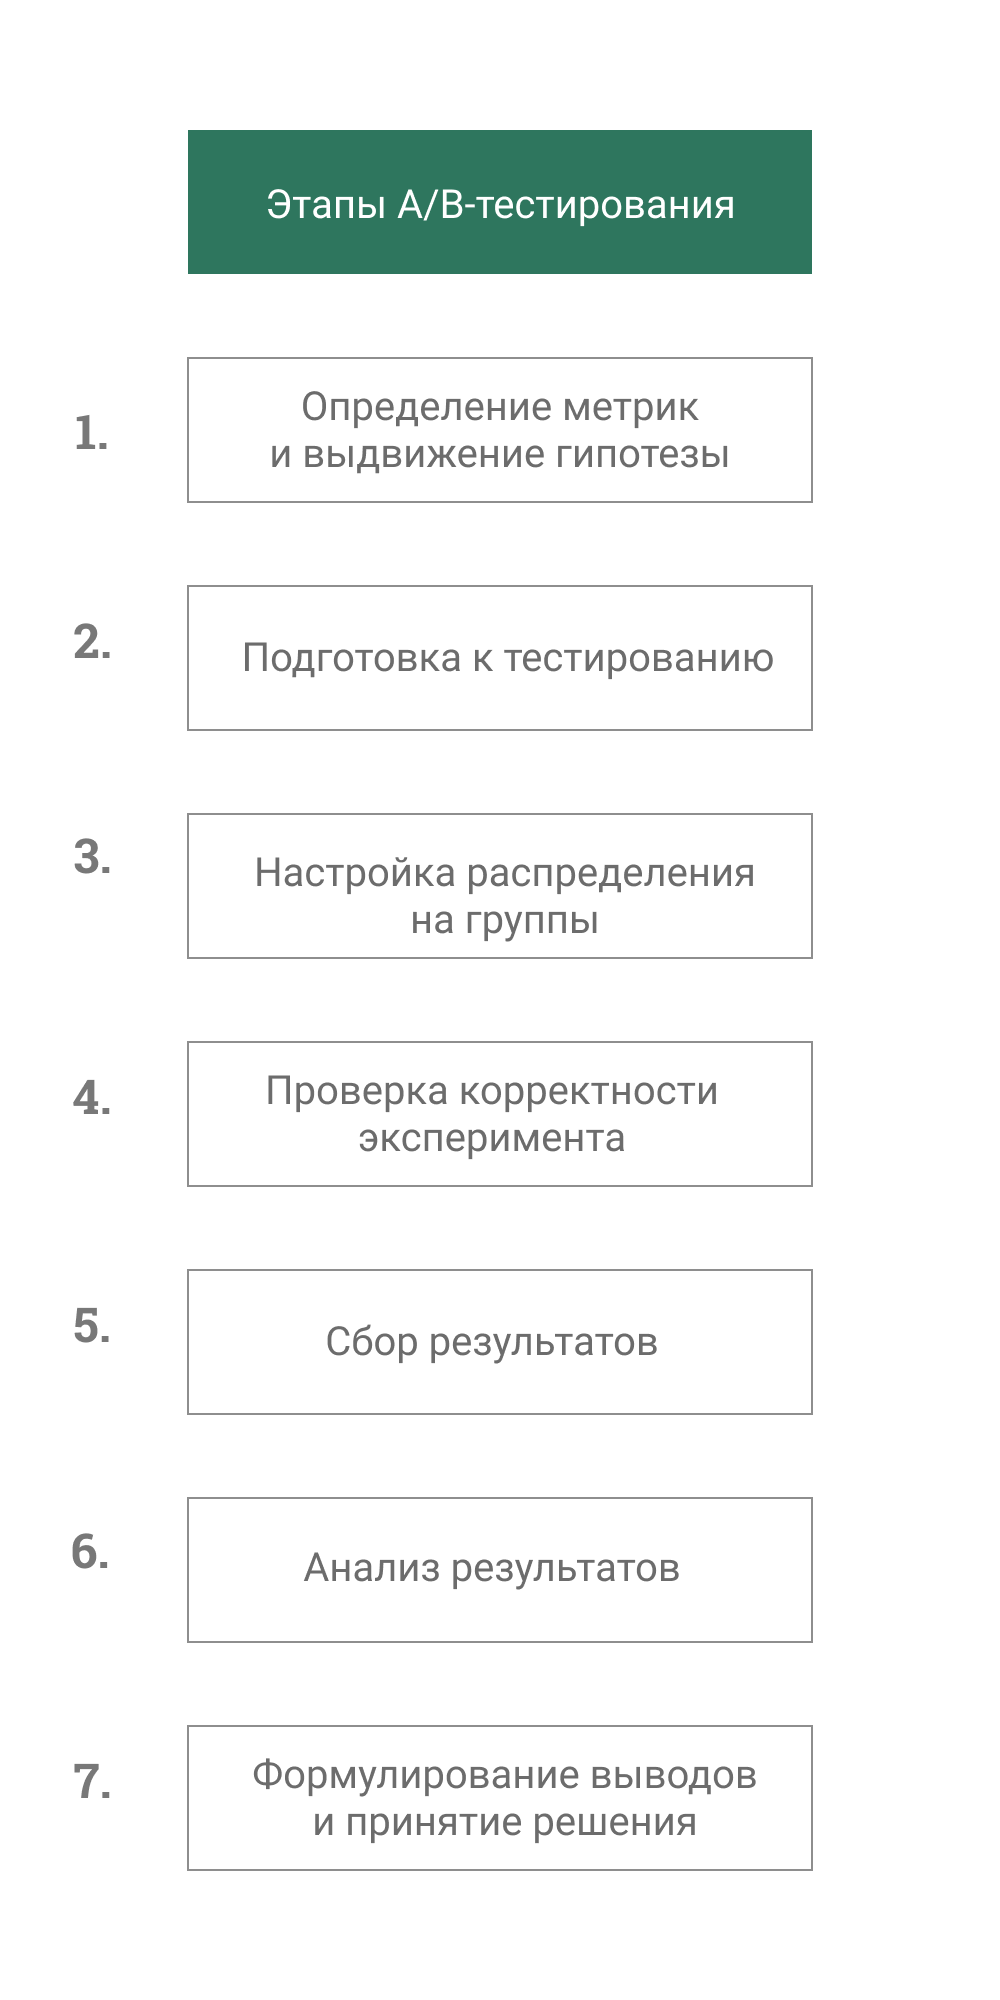

+ На каждом из этапов формулируются свои результаты, которые затем используются на следующих этапах. Главная цель A/B-тестирования — принять взвешенное, статистически доказанное решение по продукту.
+ Помним, что при проведении A/B-теста нужно следовать трём принципам:
1. исключать влияние извне;
2. использовать большое количество данных;
3. применять правильные инструменты для анализа.

+ Мы с вами сконцентрировались на этапе анализа результатов и формировании выводов. Для того чтобы грамотно оценить результаты A/B-теста, нам нужно выполнить следующие шаги:

1. подготовить наши данные к анализу и убедиться, что соблюдены принципы A/B-тестирования (в каждой группе собрано достаточно данных и длительность теста одинакова, группы сбалансированы и отсутствуют пересечения в группах);
2. визуально оценить интересующие нас метрики в каждой из групп, чтобы сделать первичные выводы;
3. убедиться в том, что метрики стабилизированы и мы можем проводить статистические тесты (помним, о проблеме подглядывания). Для этого чаще всего используются кумулятивные метрики (метрика считается стабилизированной во времени, если её кумулятивный вариант переходит в прямую на графике);
4. если метрика стабилизировалась, то мы можем проводить статистические тесты, которые позволяют проверить гипотезу о равенстве показателей в группах при альтернативных гипотезах (неравенство/больше/меньше), но предварительно необходимо узнать распределение показателя, который мы пытаемся сравнить (помним о том, что каждый тест имеет свою область применения);
5. в комплексе со статистическими тестами мы можем использовать доверительные интервалы для параметра, чтобы оценить его возможные границы;
6. на основе результатов статистических тестов и построенных доверительных интервалов мы формируем вывод и принимаем решение.

### ✍️ А теперь пора попрактиковаться на реальной задаче!

# 8. Итоги модуля

### ⭐️ Модуль, посвящённый A/B-тестированию, подошёл к концу! Это большая и сложная тема — охватить её полностью практически невозможно. Но вы сделали первые шаги в этом направлении.

### Методов для проверки гипотез существует гораздо больше, и многие из них заменяют друг друга. Но будьте уверены: того объёма, который вы освоили, будет достаточно для начала. 

### Заложенный фундамент позволит вам решить 90 % задач, которые встретятся на вашем тернистом пути исследователя данных. Остальное вы сможете узнать уже в процессе профессиональной деятельности. 

## ИТАК, В ЭТОМ МОДУЛЕ МЫ:

✔️ Рассмотрели теорию A/B-тестирования и примеры его применения в различных сферах.

✔️ Разобрали основные этапы A/B-тестирования и основные принципы его проведения.

✔️ Научились определять параметры A/B-теста для задачи повышения конверсии: размер выборки и длительности теста.

✔️ Изучили основные инструменты для анализа результатов A/B-тестирования: кумулятивные графики, статистические тесты и доверительные интервалы.

✔️ Решили практическую задачу на оценку результатов A/B-тестирования.

И напоследок напомним: никогда не забывайте про предварительный анализ и предобработку данных! 

## ДОПОЛНИТЕЛЬНЫЕ МАТЕРИАЛЫ

+ «Вредные советы» от экспертов о том, как правильно проводить A/B-тестирование (https://nplus1.ru/material/2020/03/27/course-data-science-chapter-8)
+ Ещё один пример анализа результатов A/B-тестирования (https://towardsdatascience.com/ab-testing-with-python-e5964dd66143)
+ Статья о A/B-тестировании от экспертов-аналитиков SkillFactory (https://blog.skillfactory.ru/glossary/a-b-testirovanie/)